In [1]:
import os
import sys
import pickle

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append('../')

from utils.dataset import repair_non_squared_stamp, preprocess_stamps

In [2]:
df = pd.read_pickle("../../pickles/0.pickle")

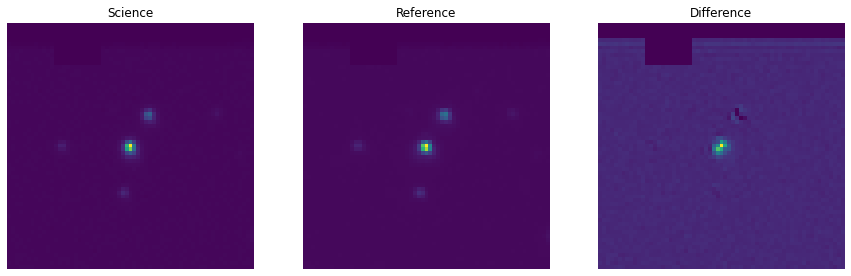

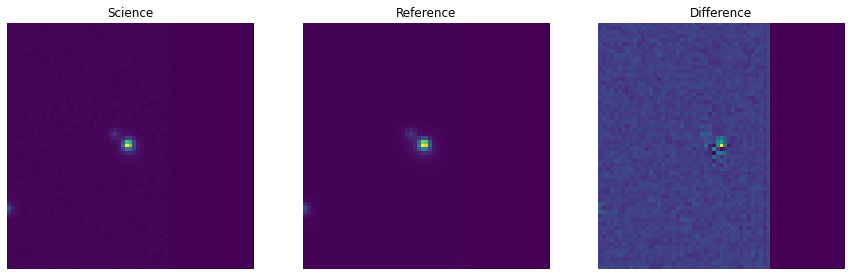

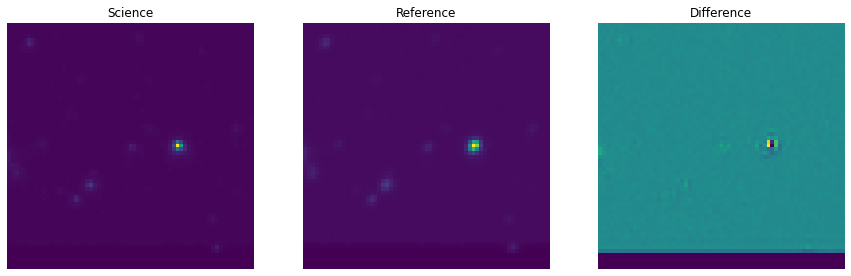

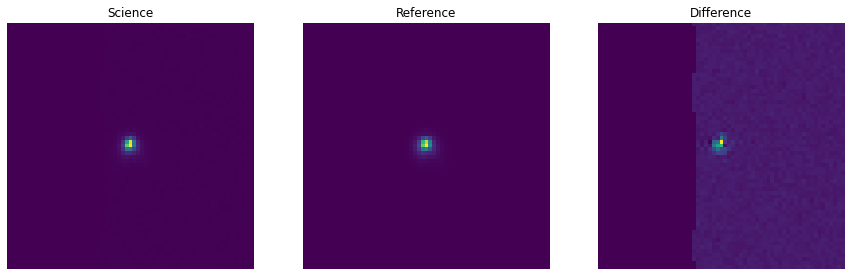

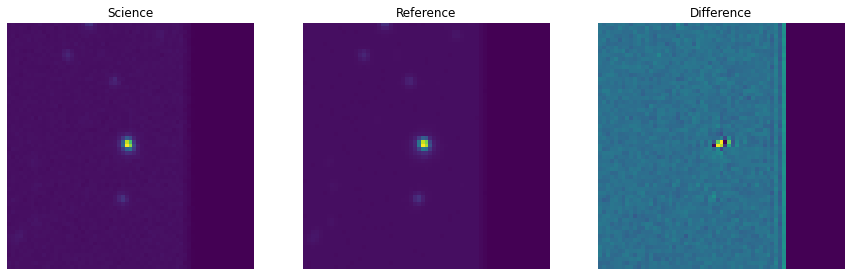

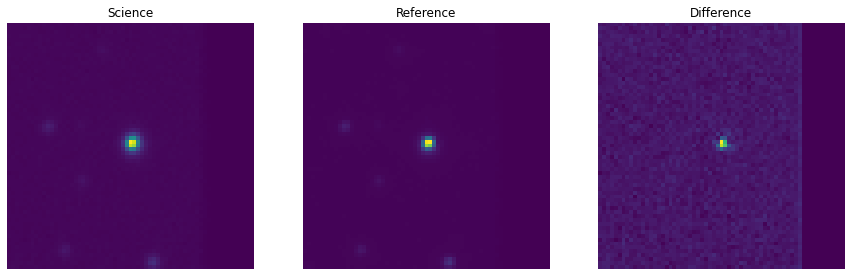

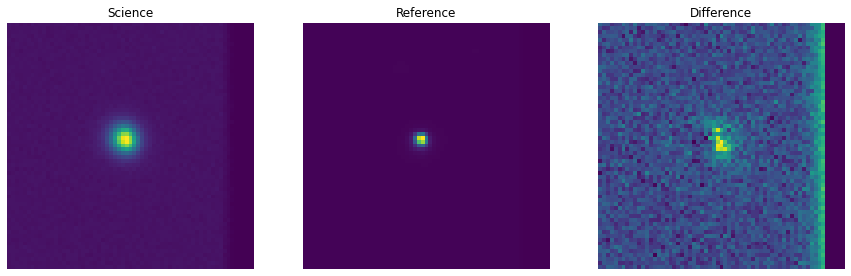

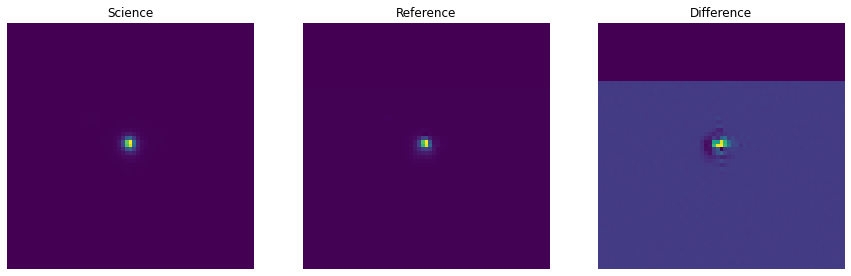

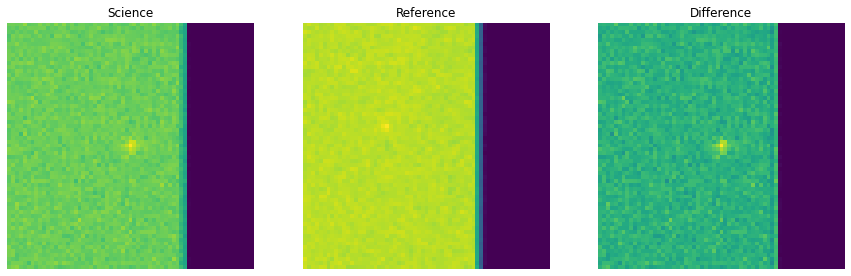

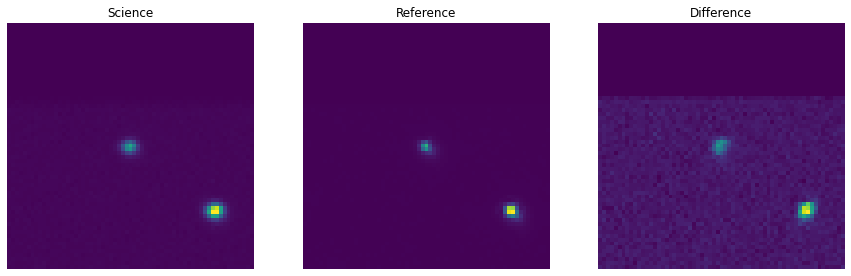

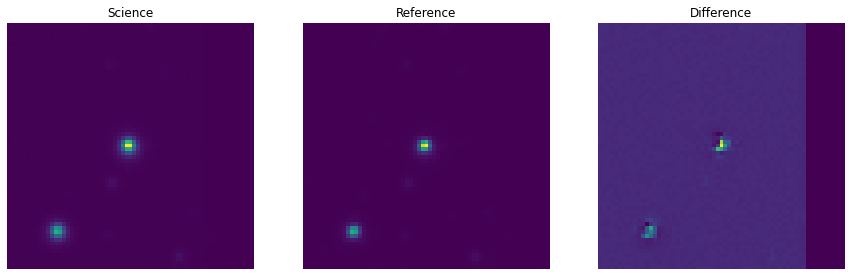

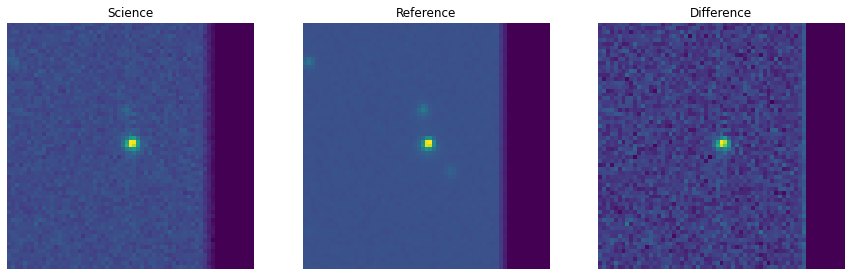

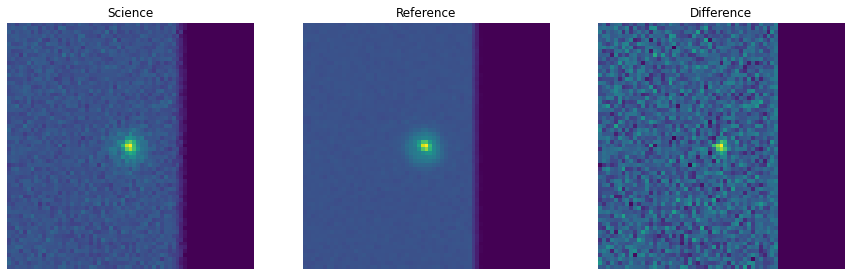

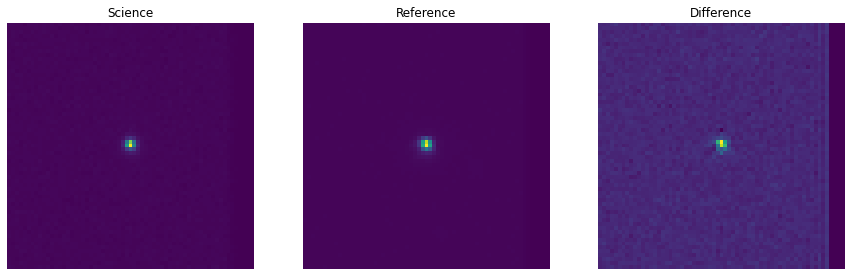

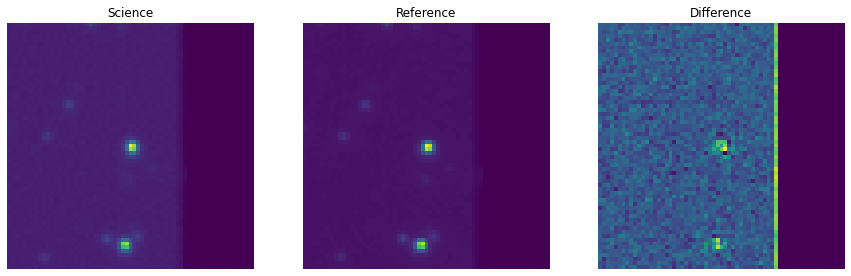

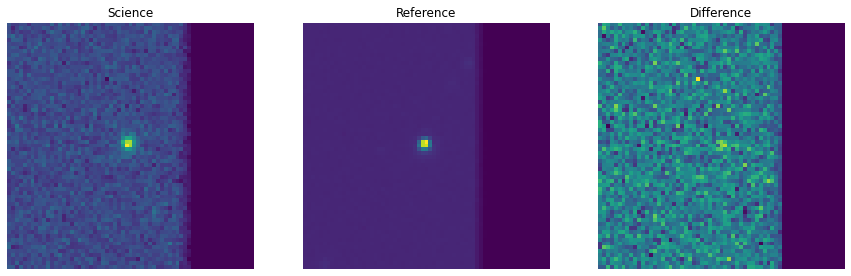

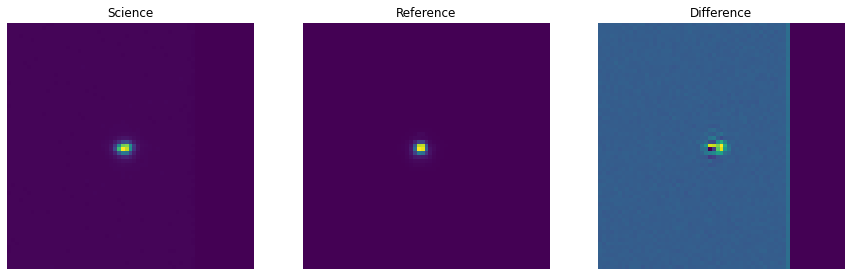

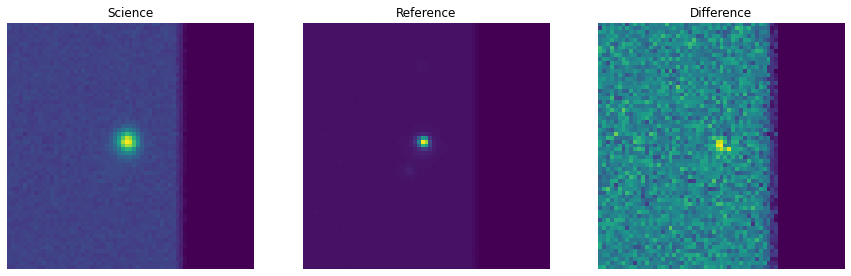

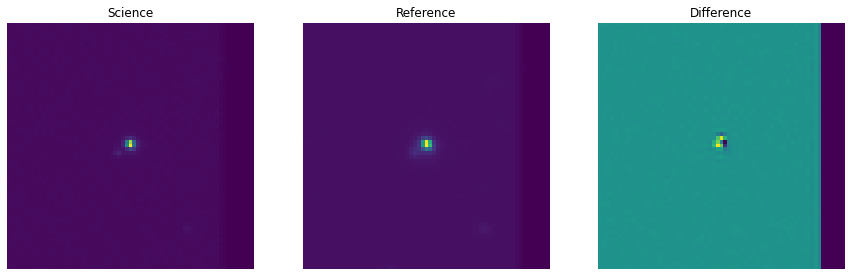

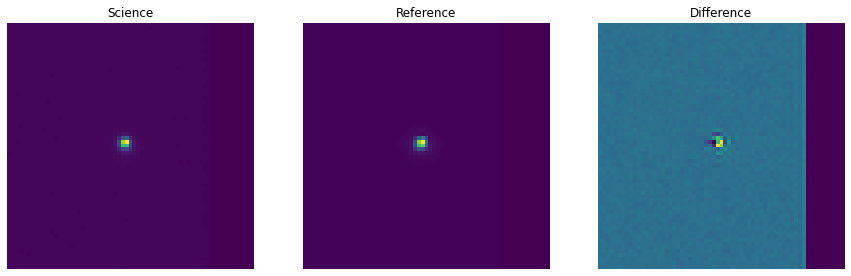

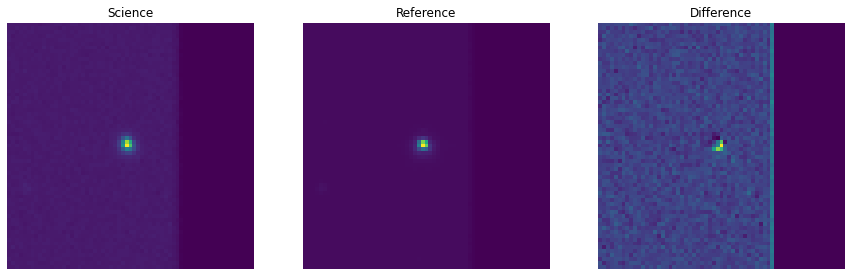

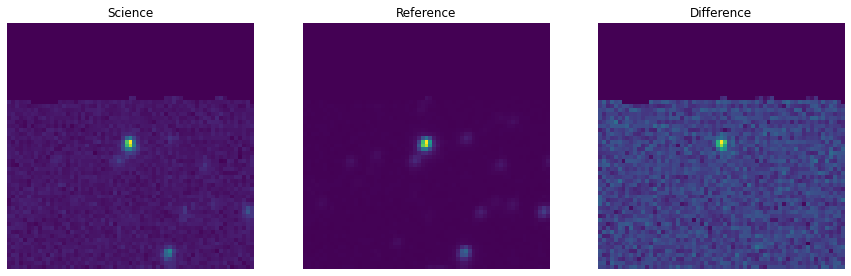

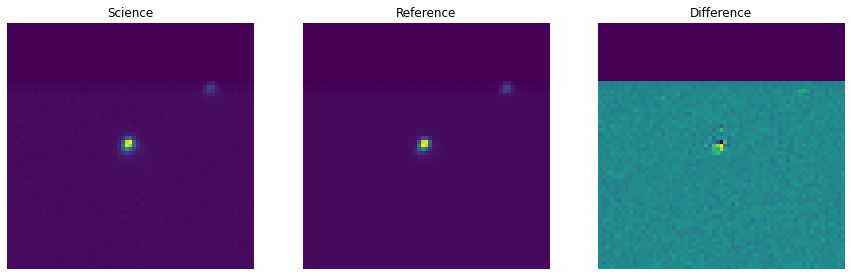

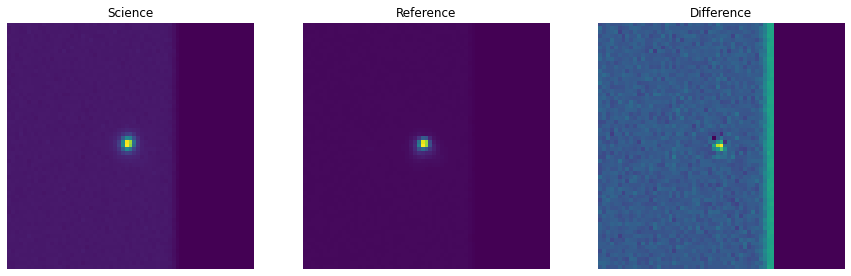

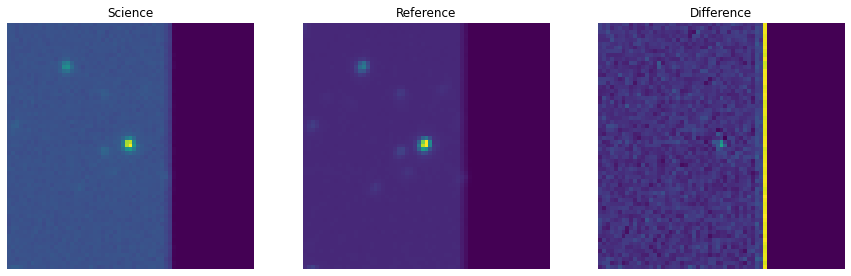

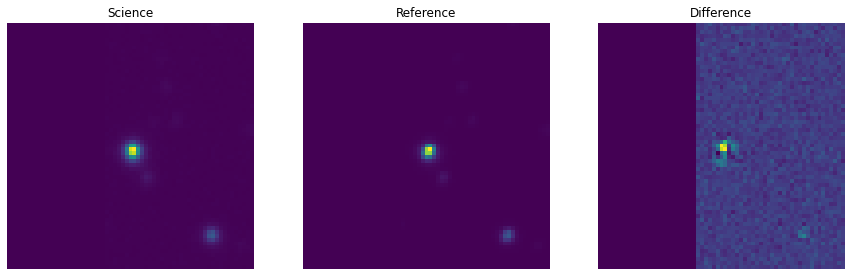

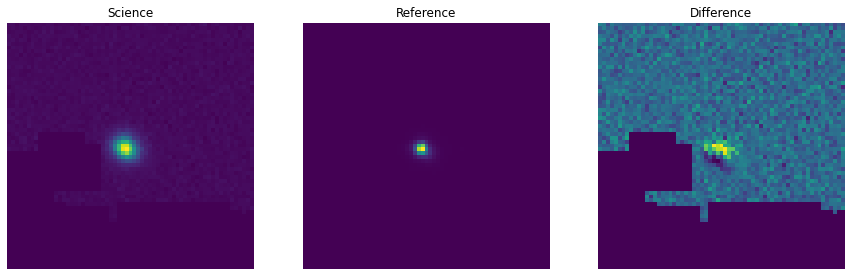

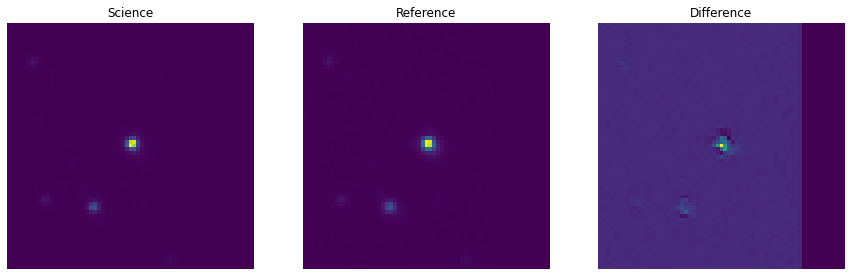

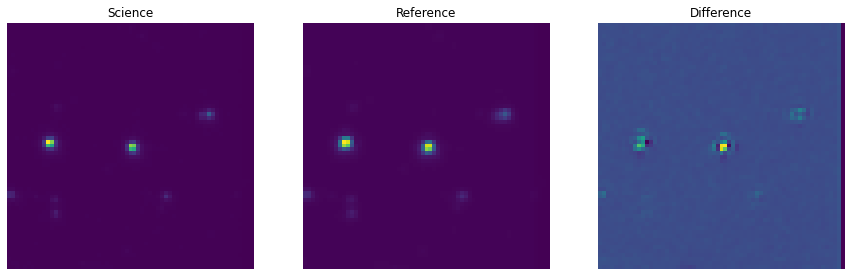

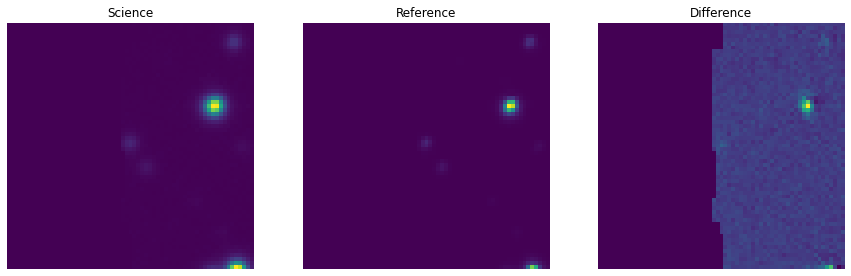

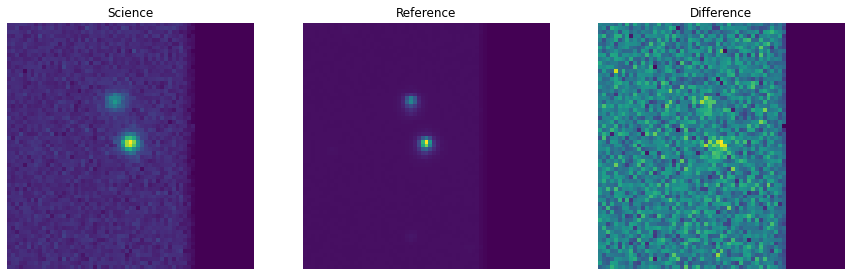

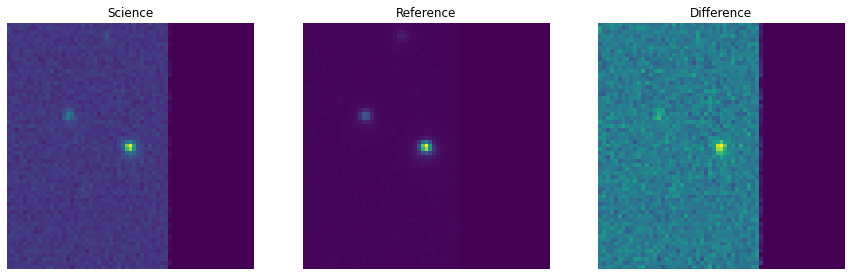

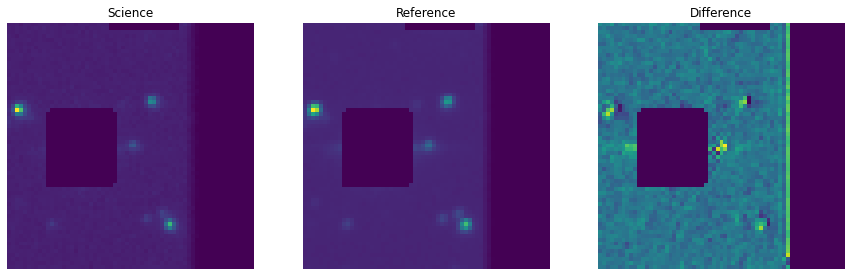

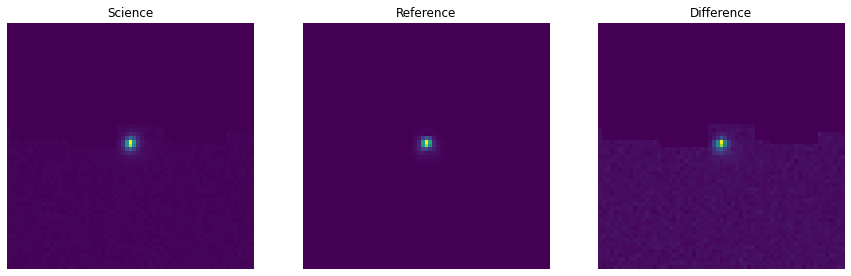

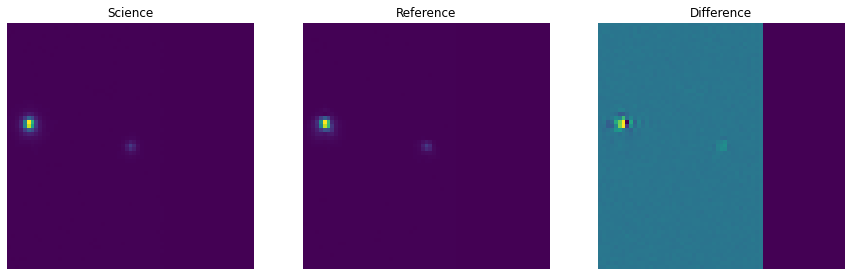

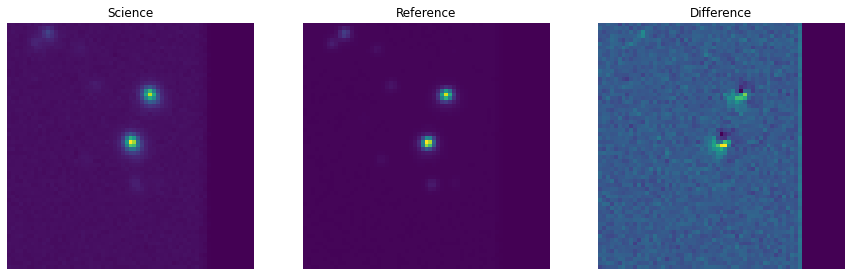

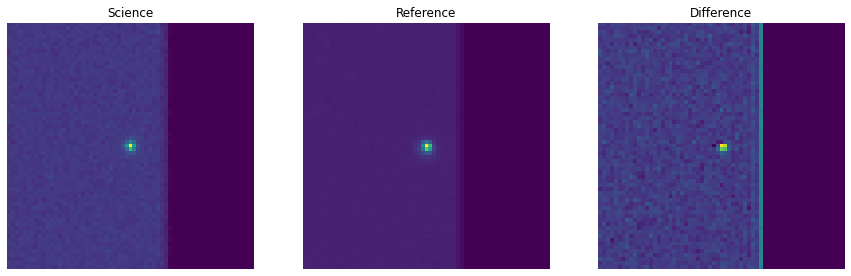

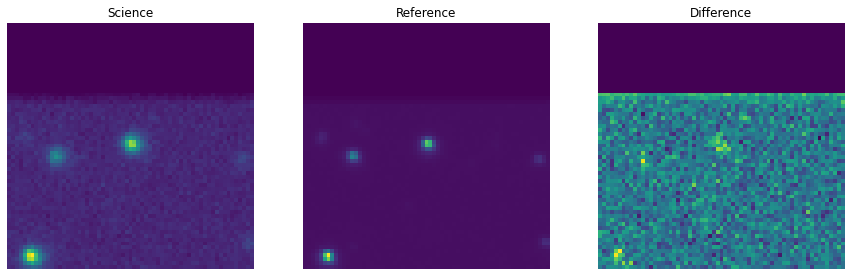

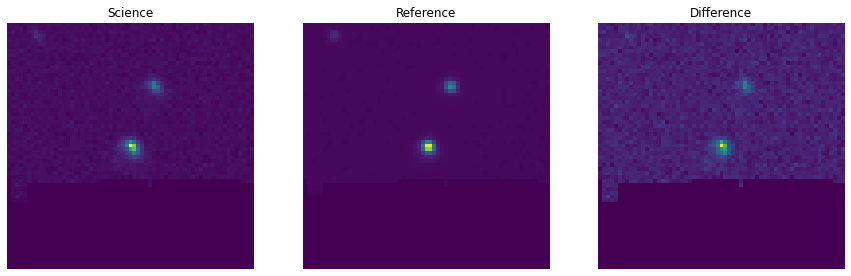

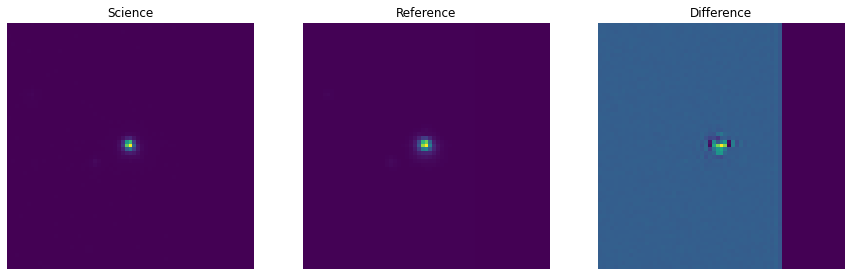

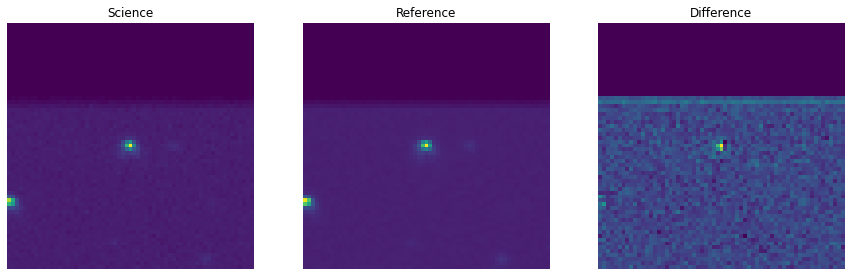

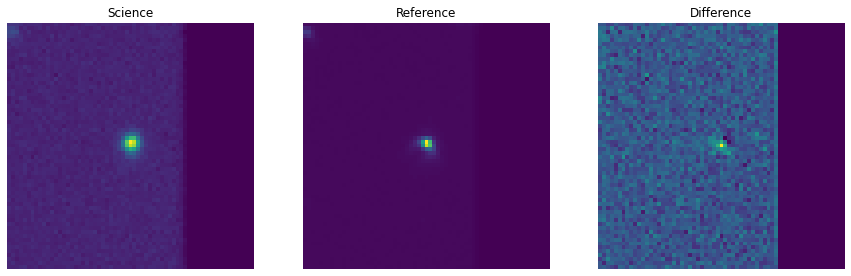

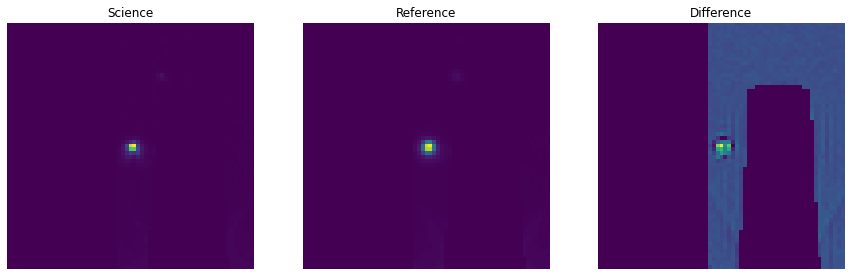

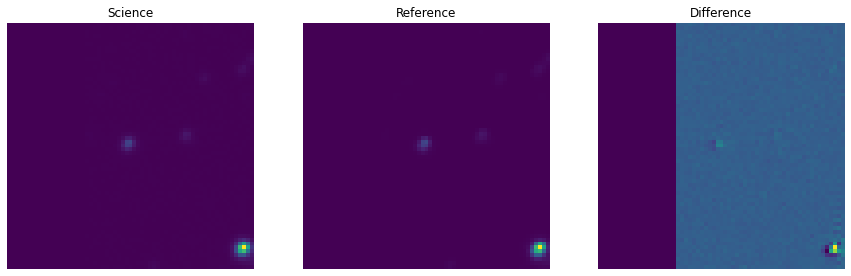

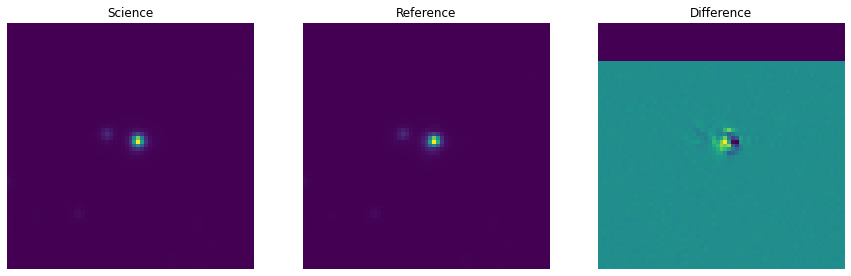

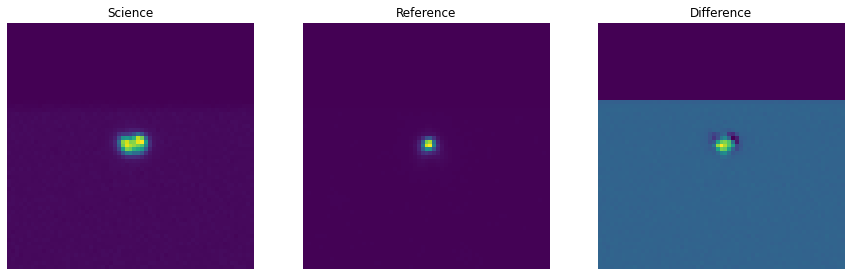

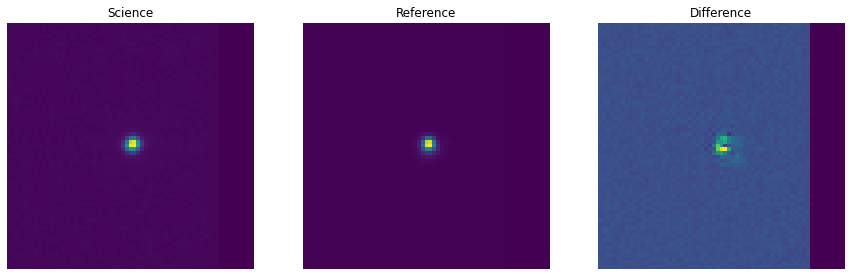

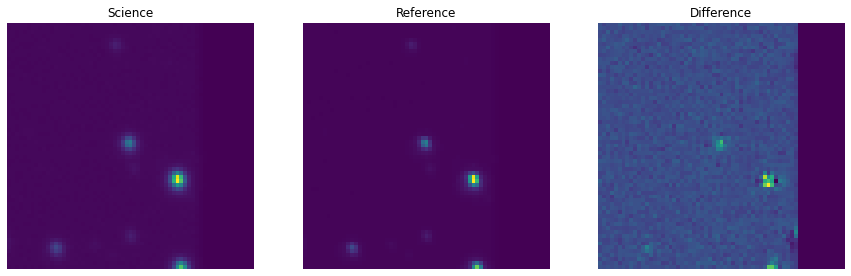

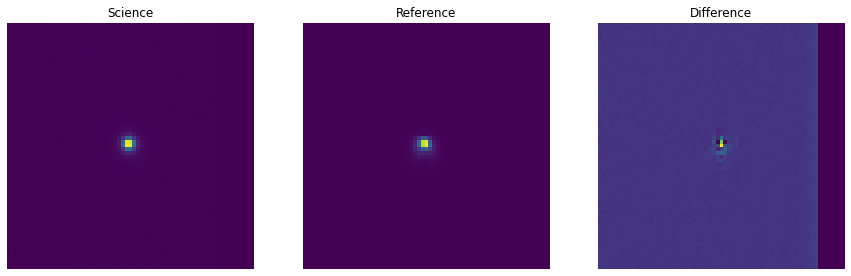

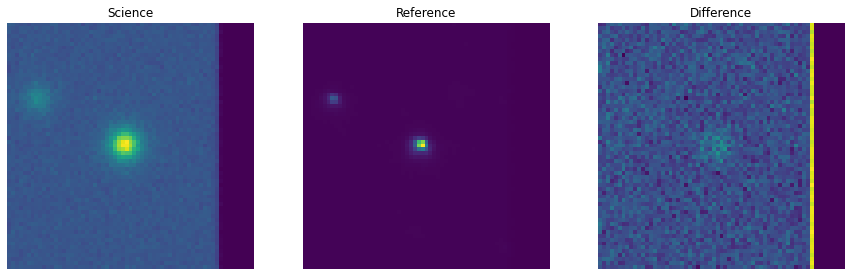

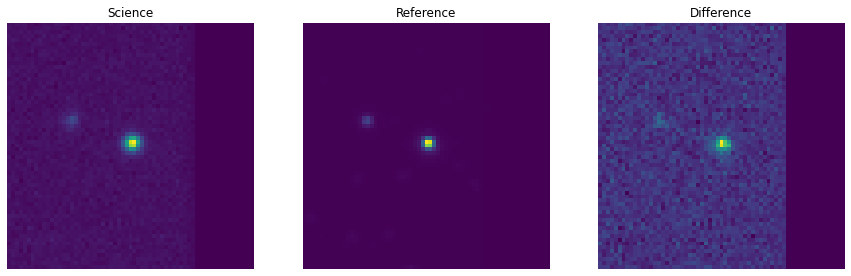

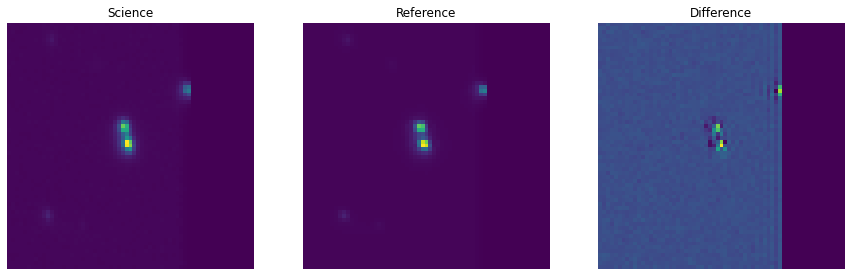

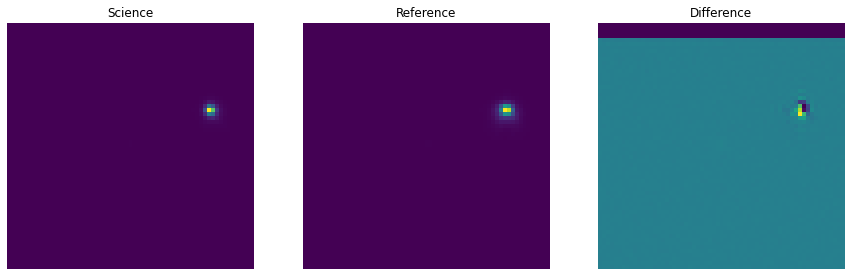

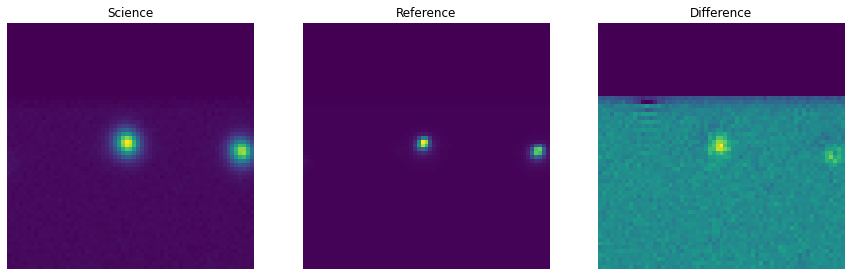

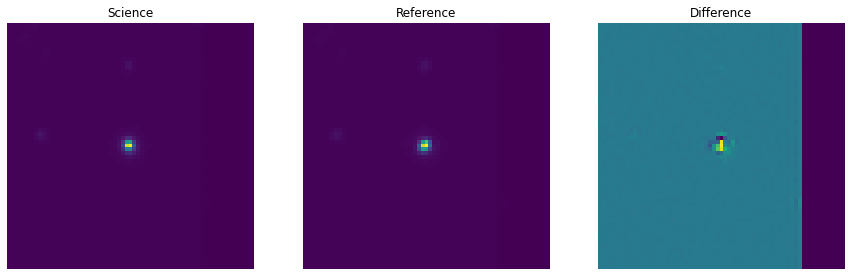

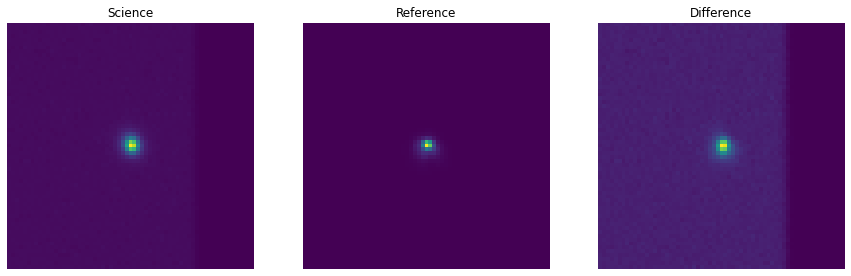

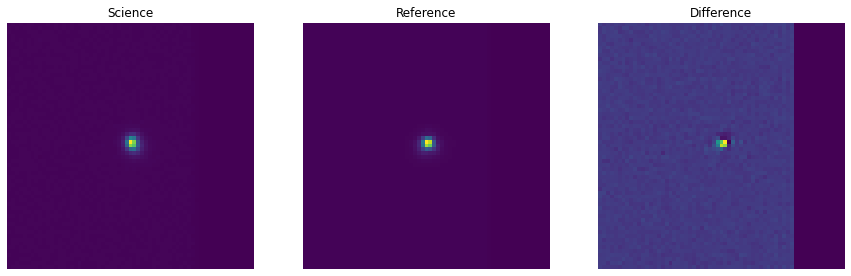

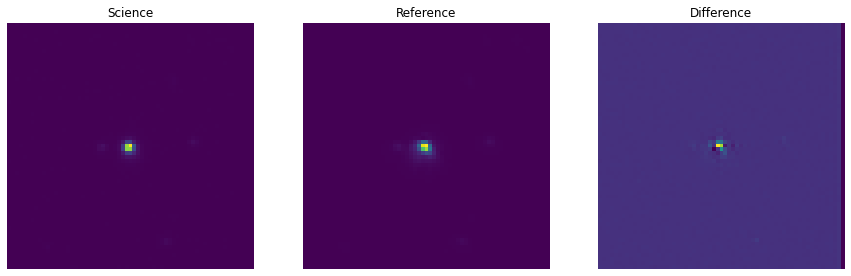

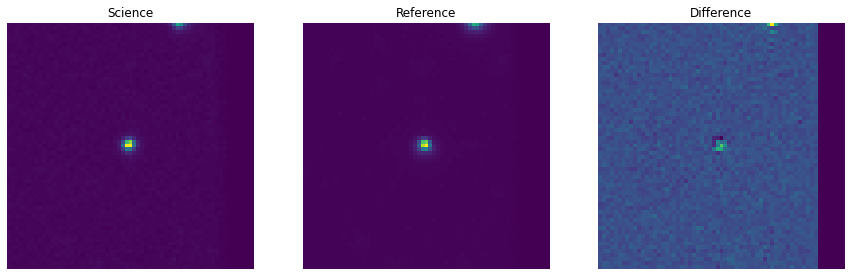

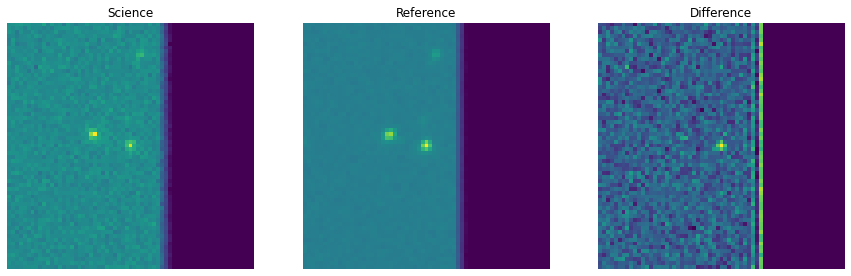

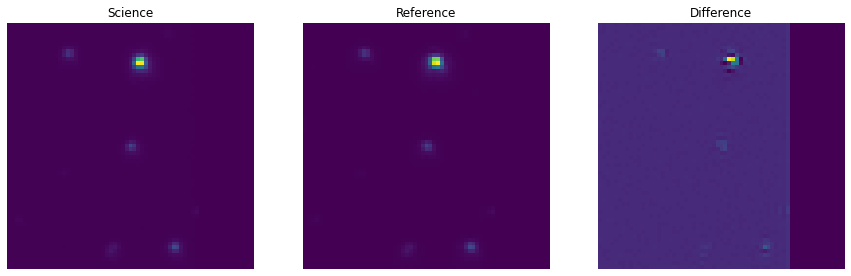

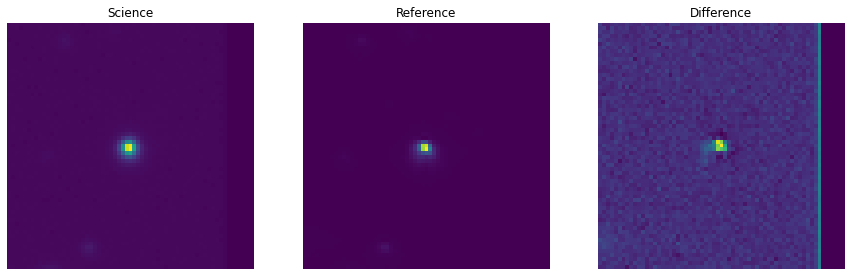

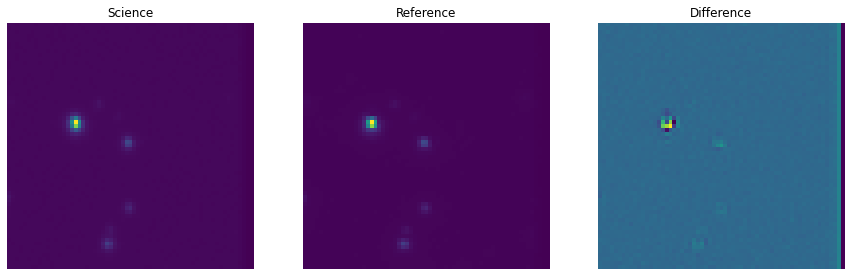

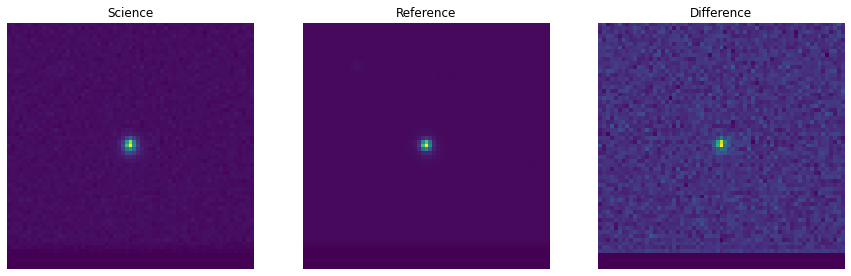

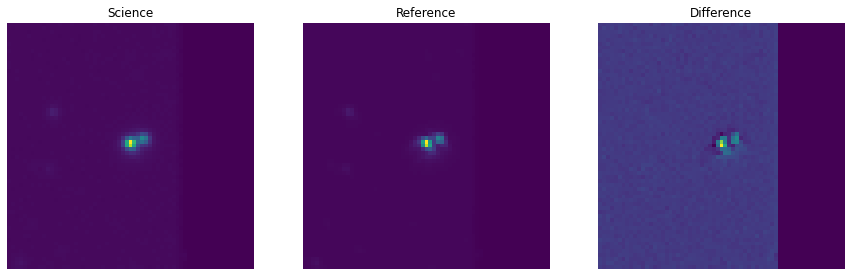

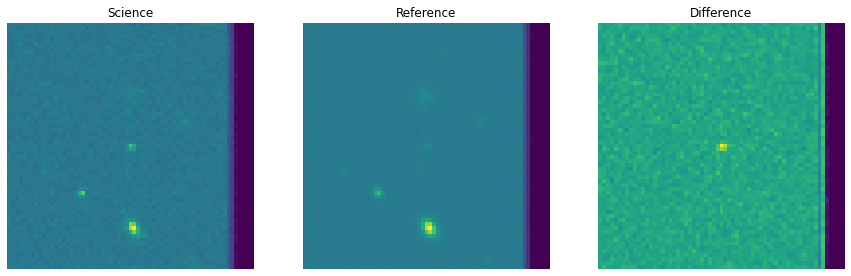

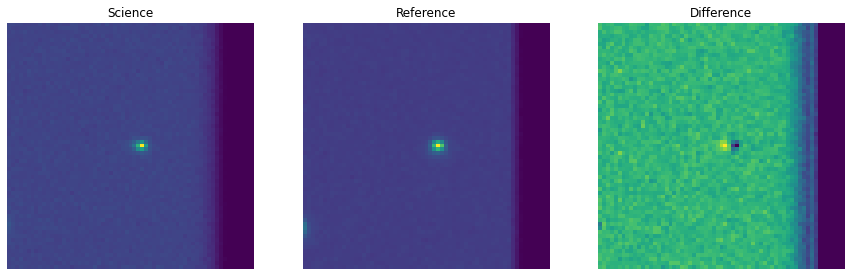

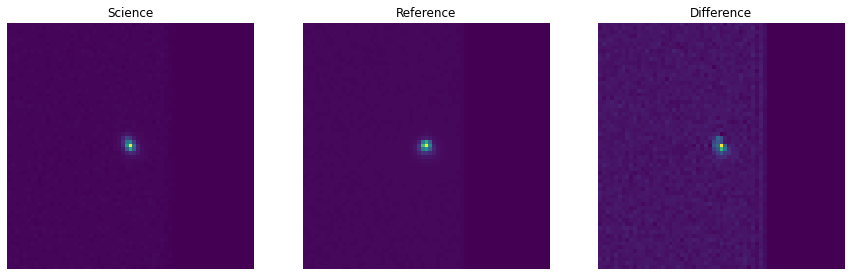

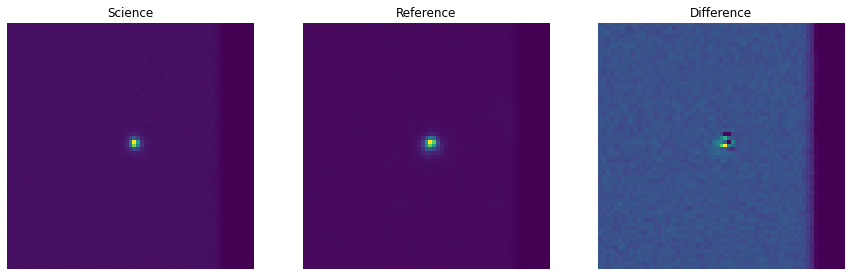

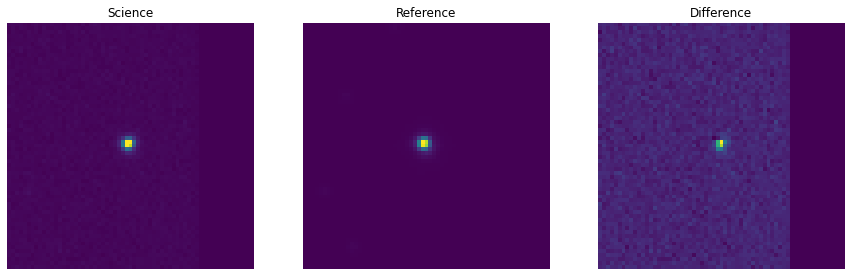

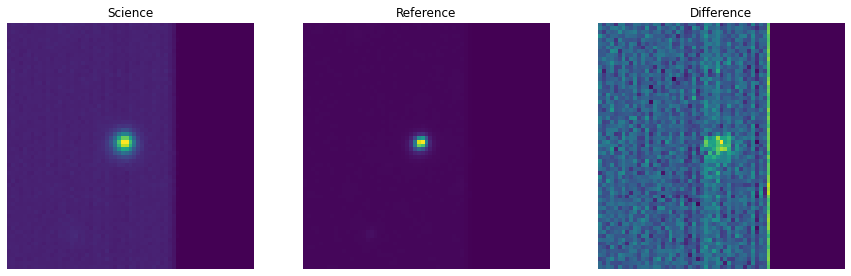

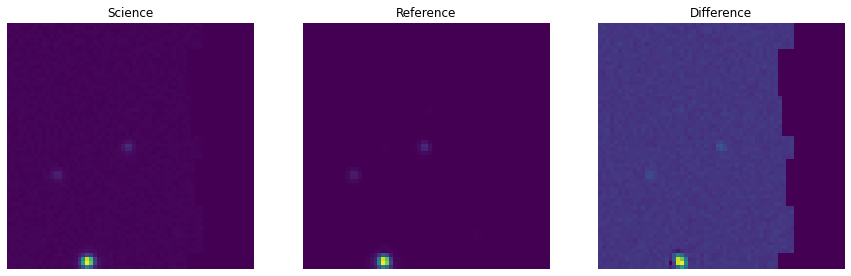

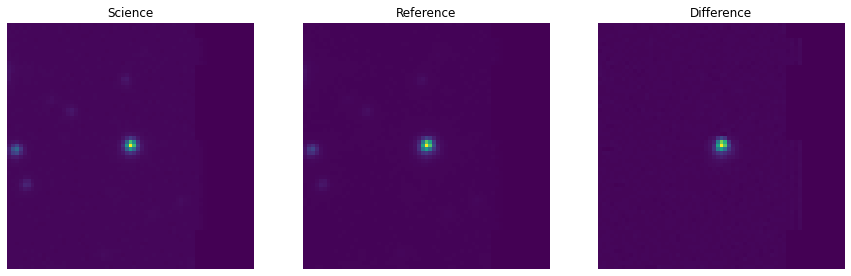

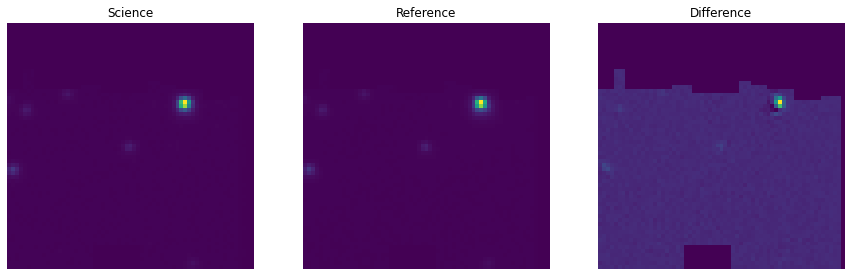

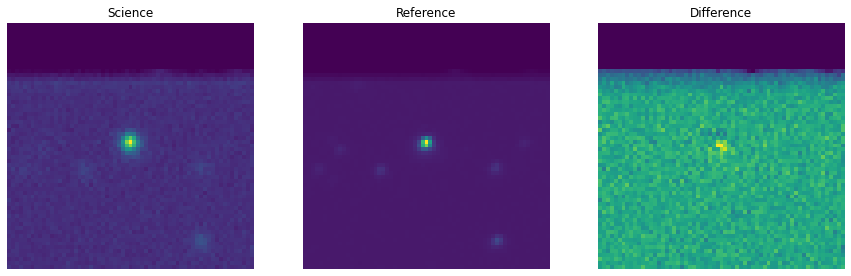

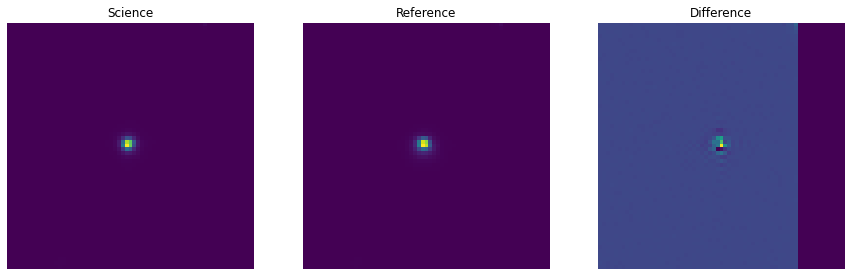

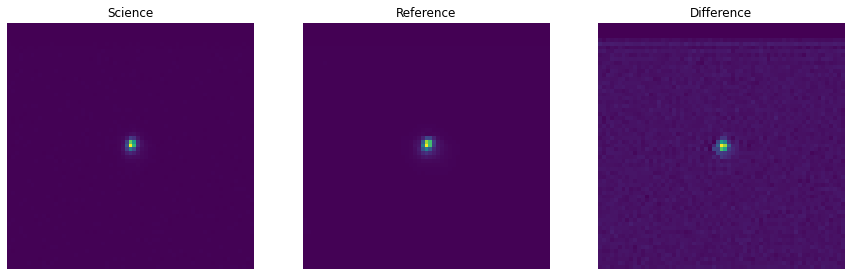

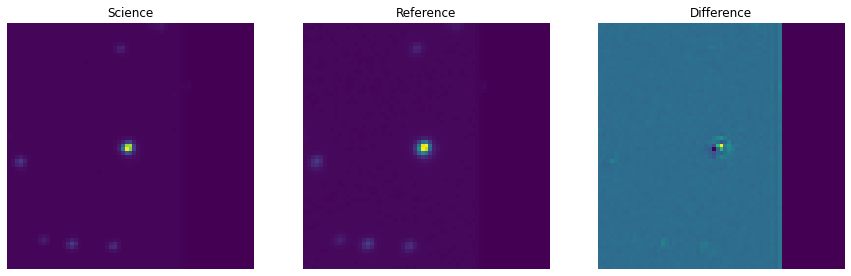

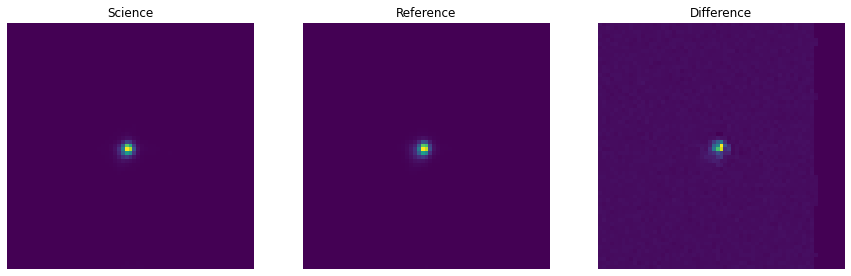

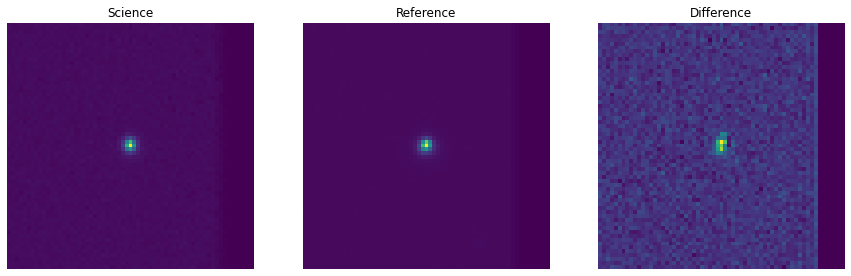

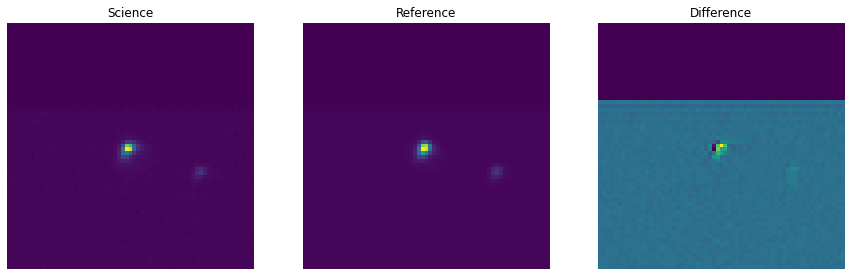

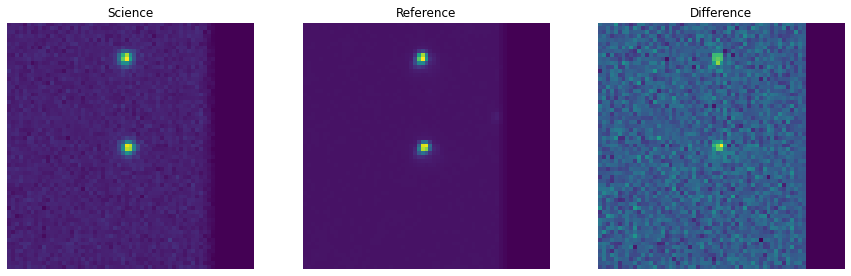

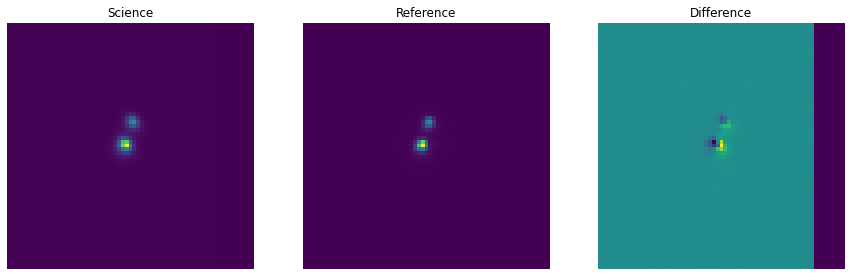

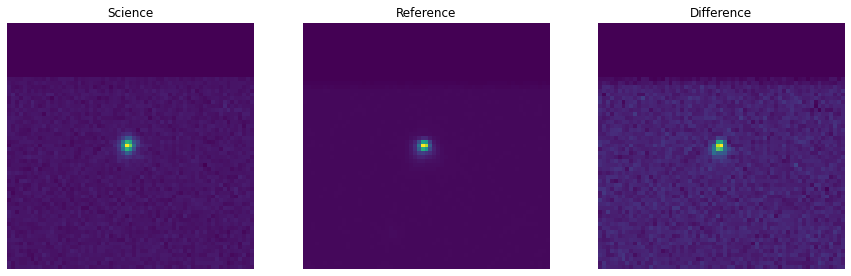

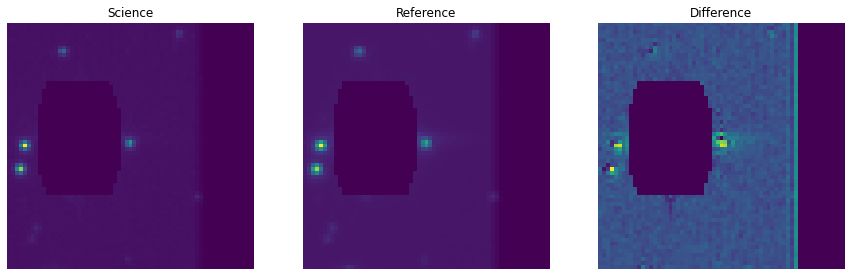

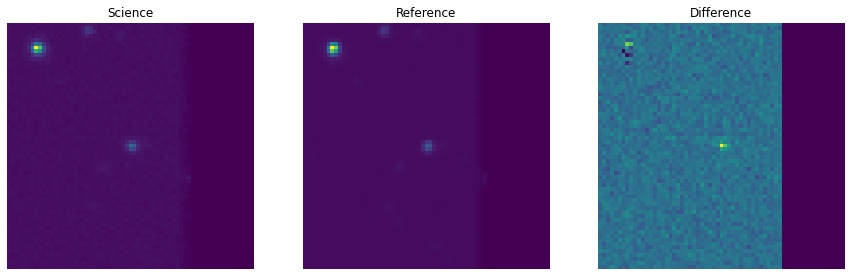

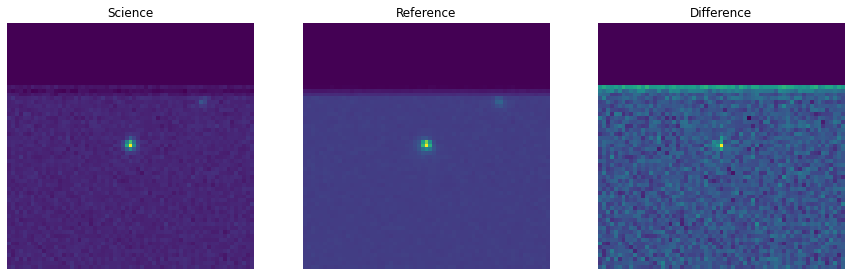

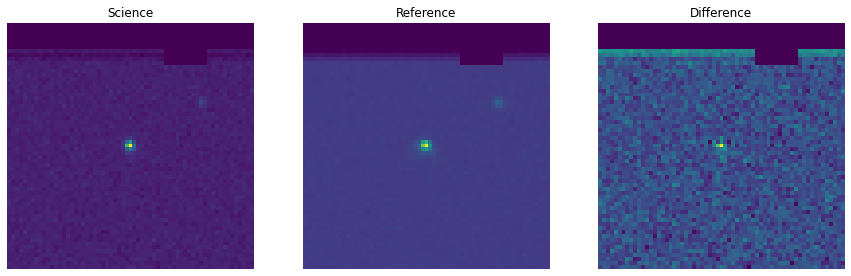

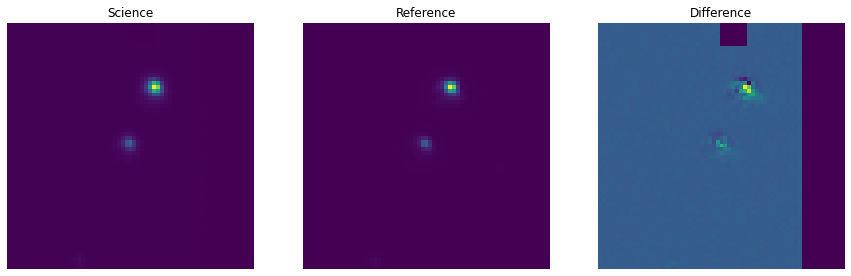

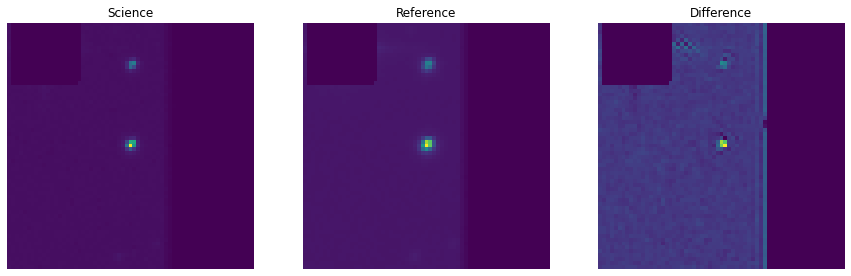

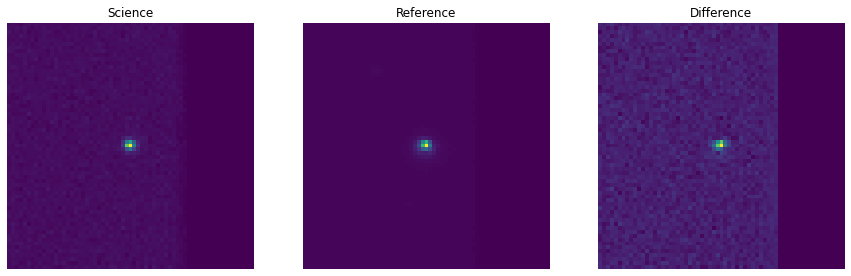

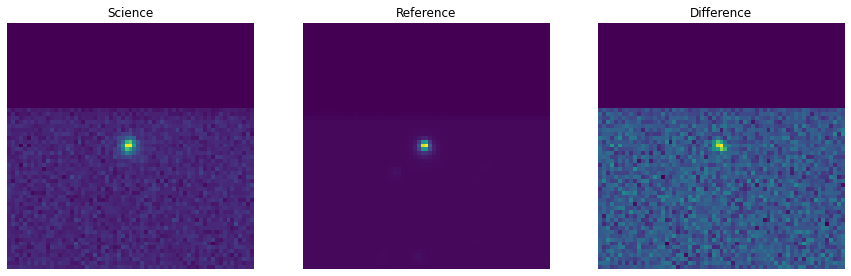

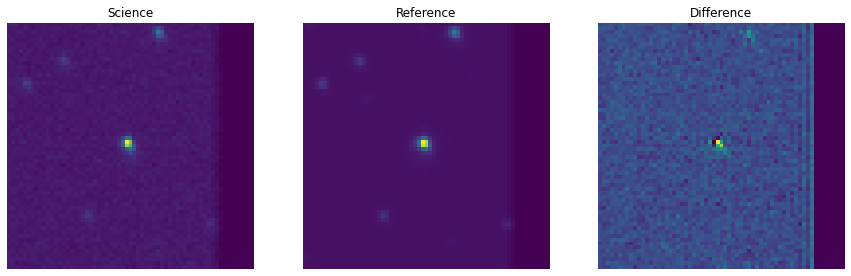

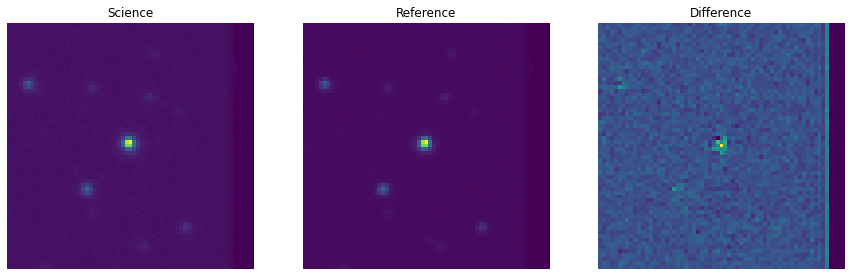

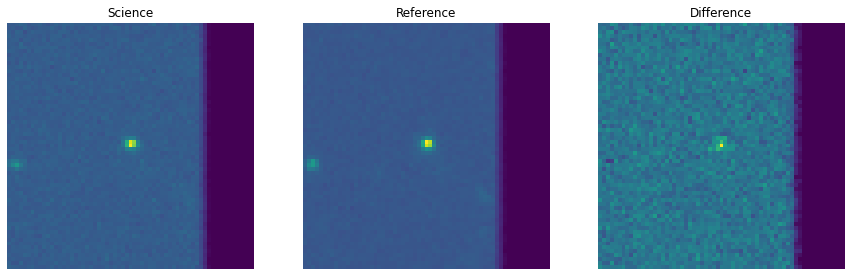

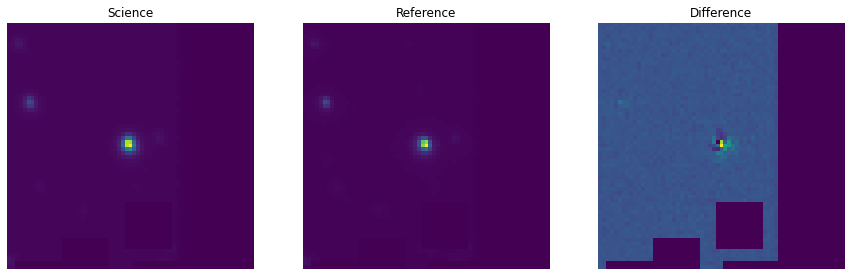

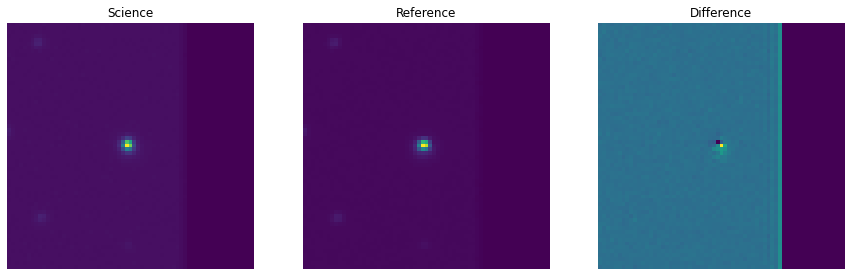

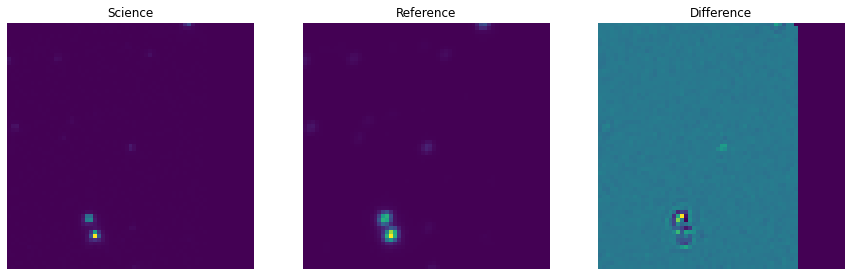

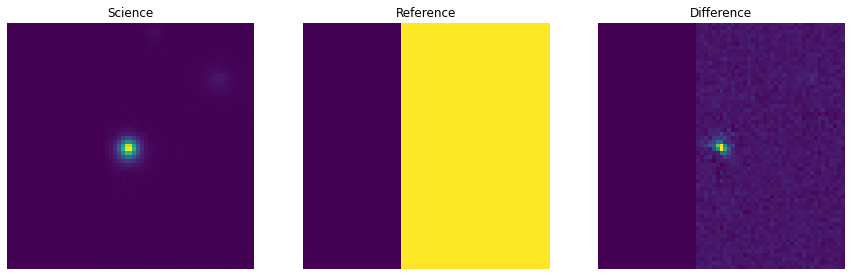

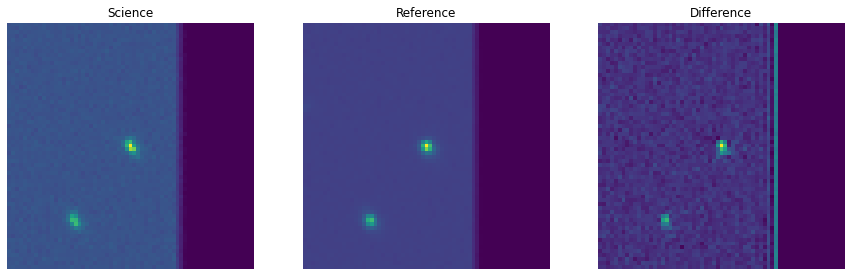

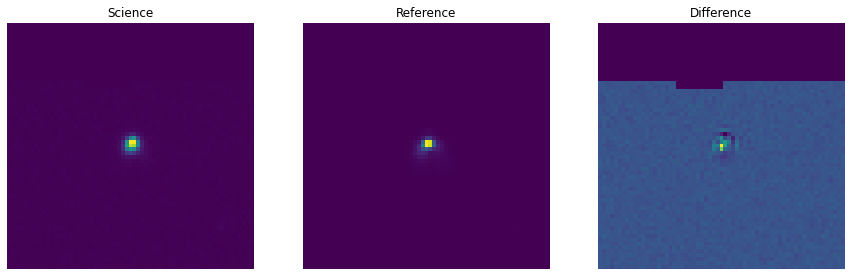

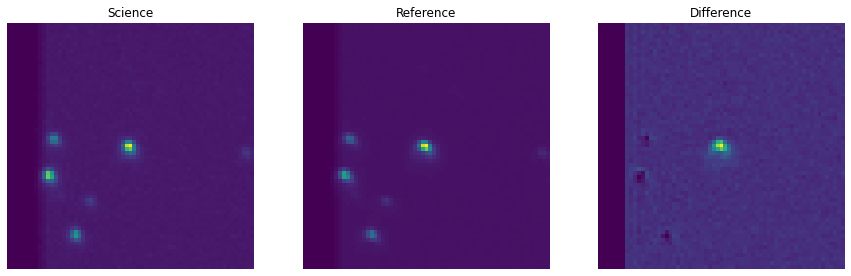

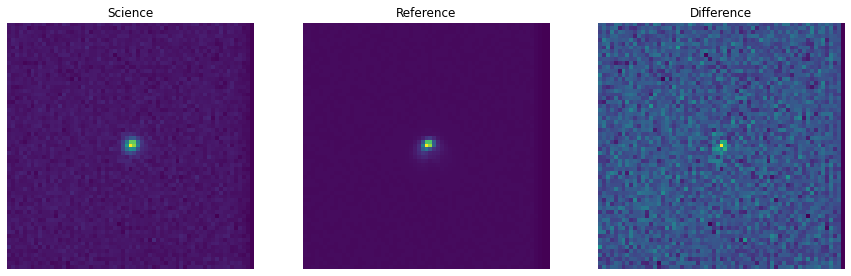

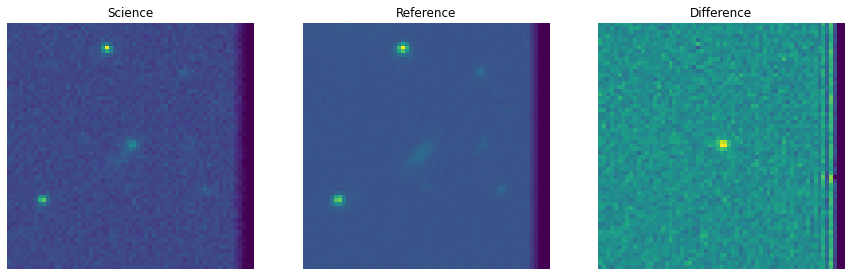

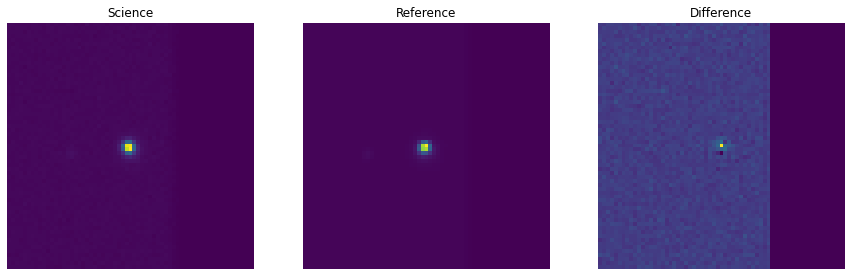

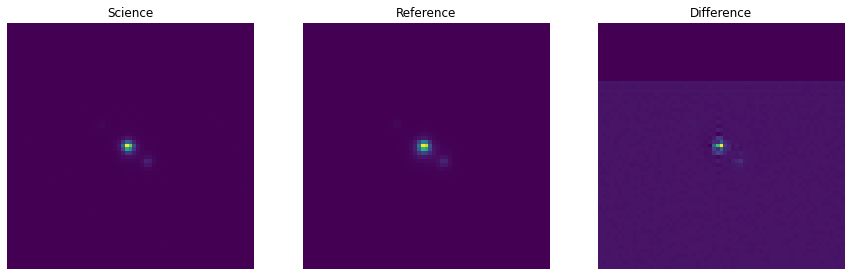

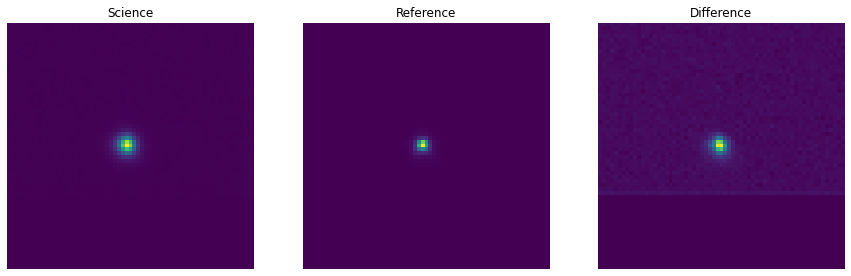

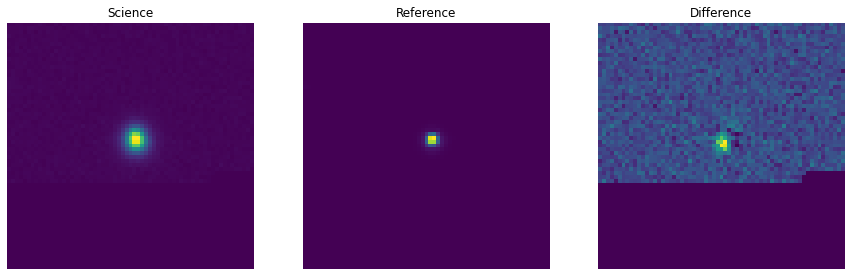

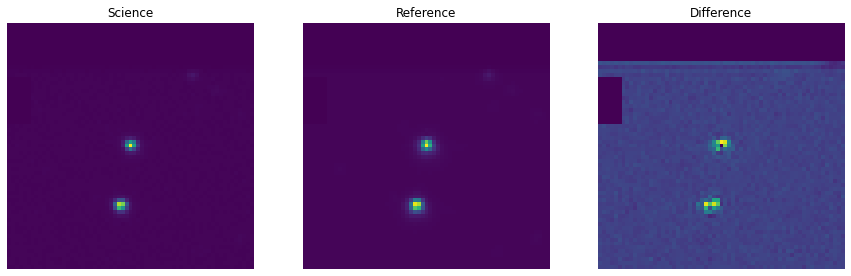

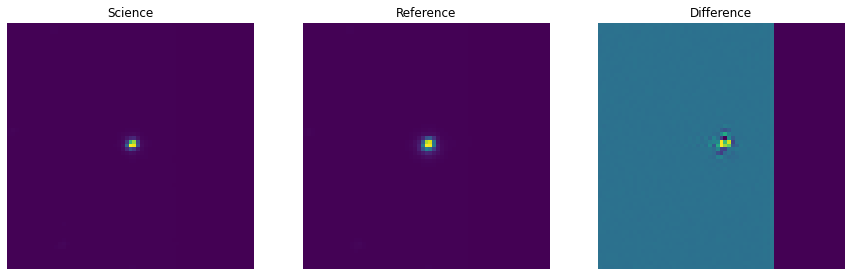

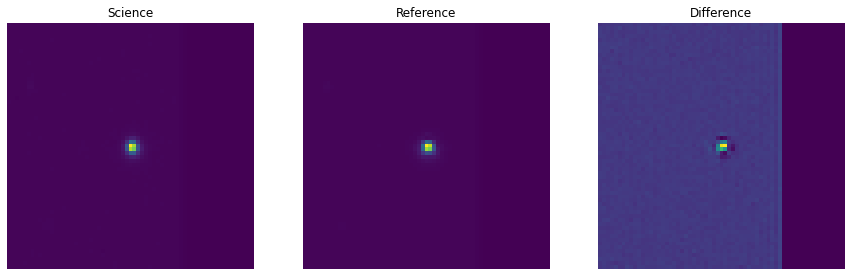

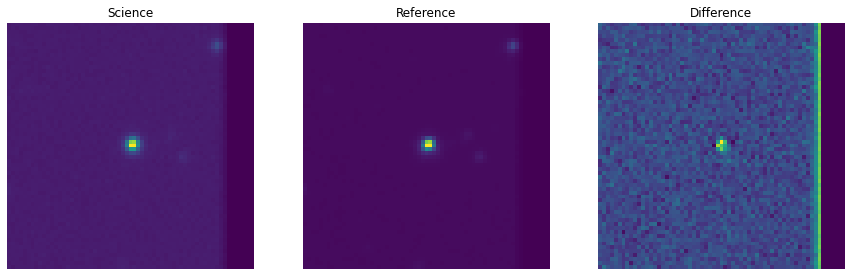

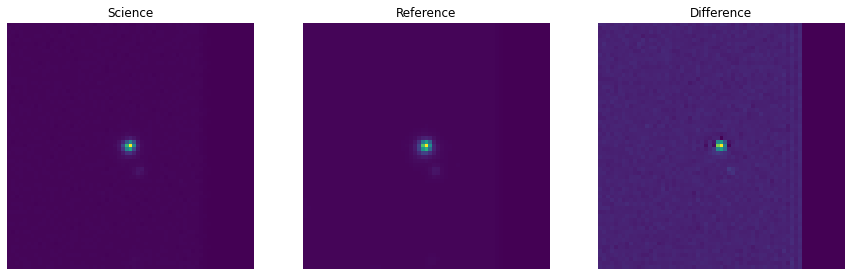

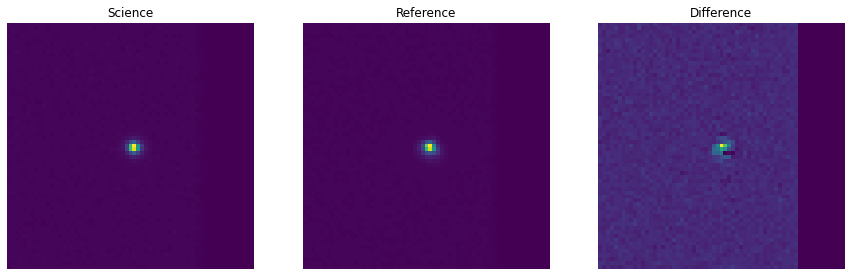

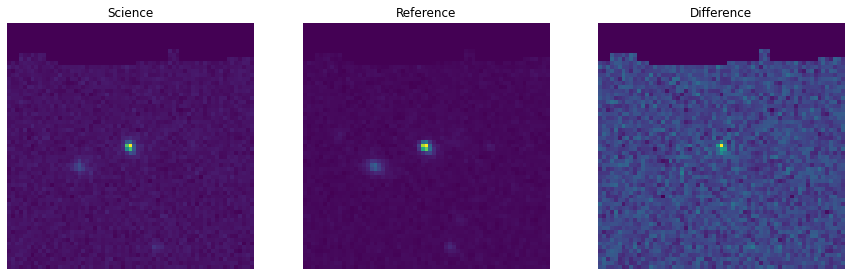

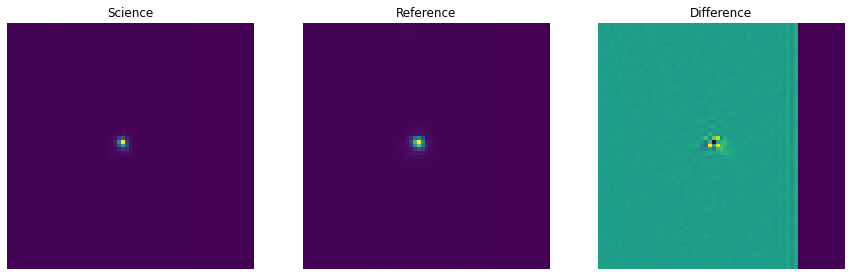

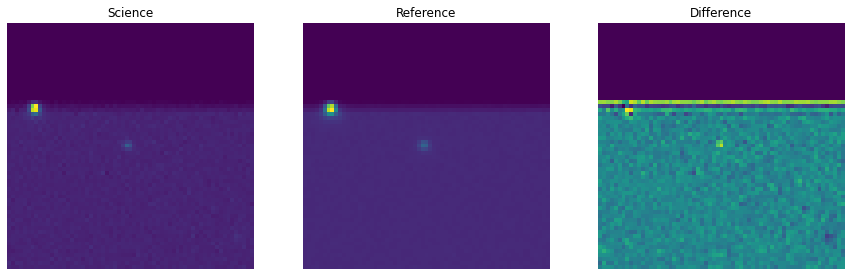

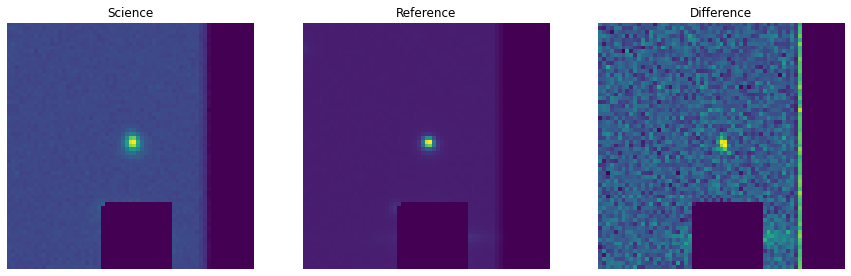

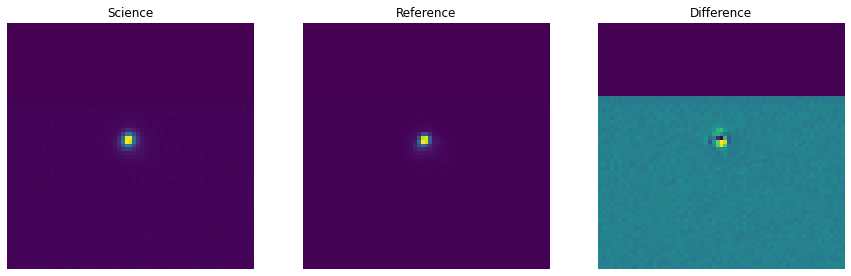

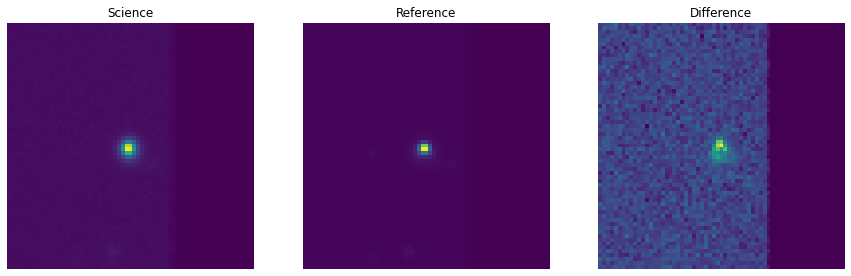

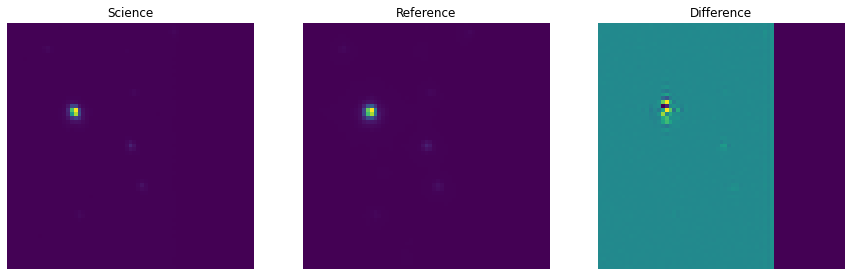

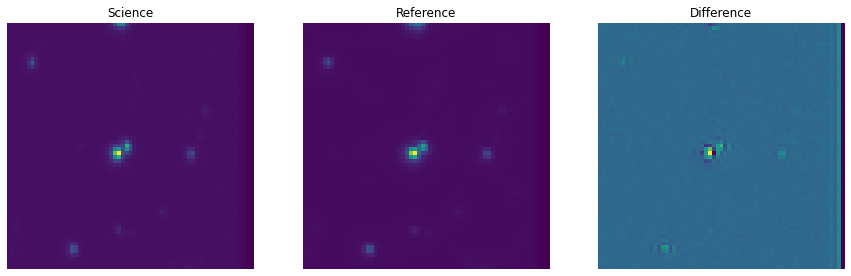

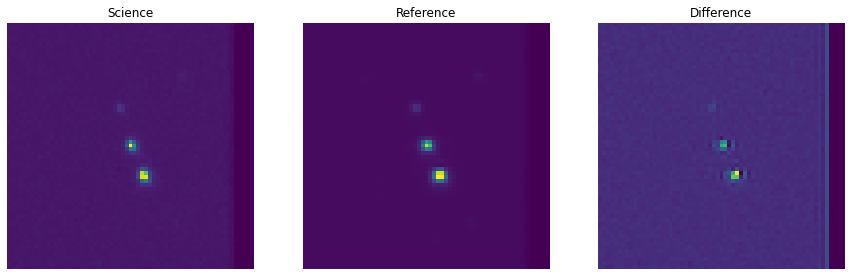

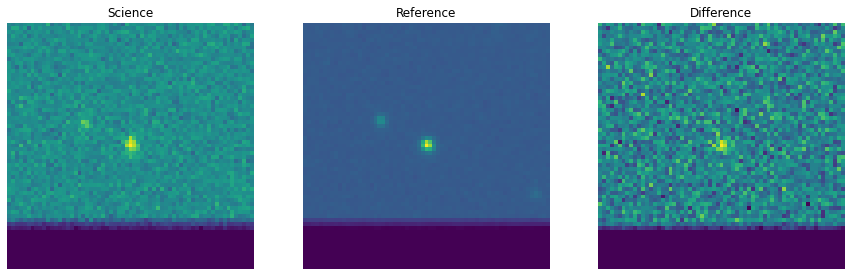

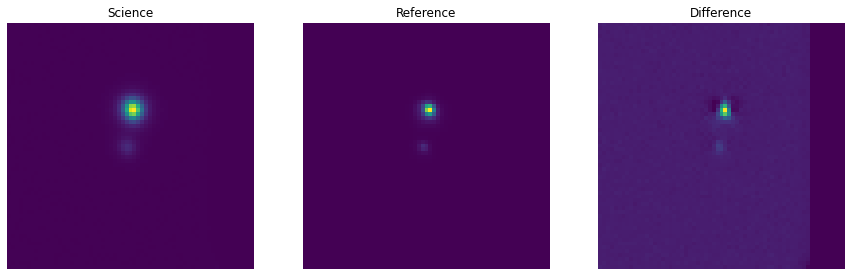

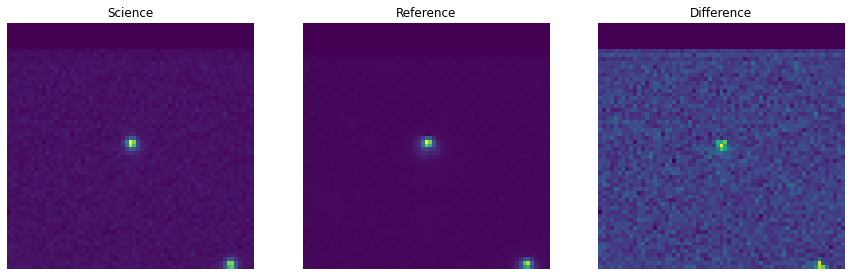

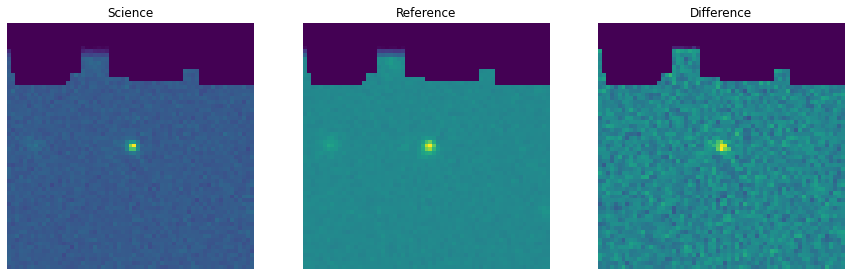

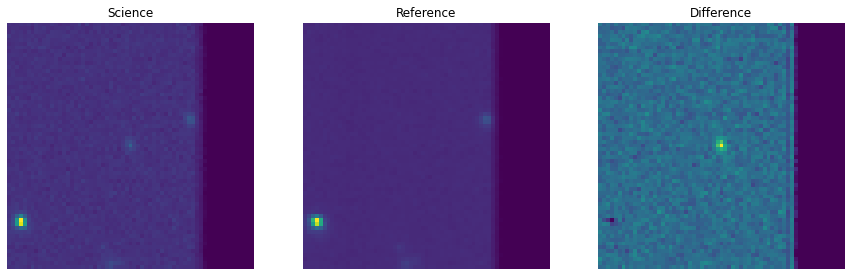

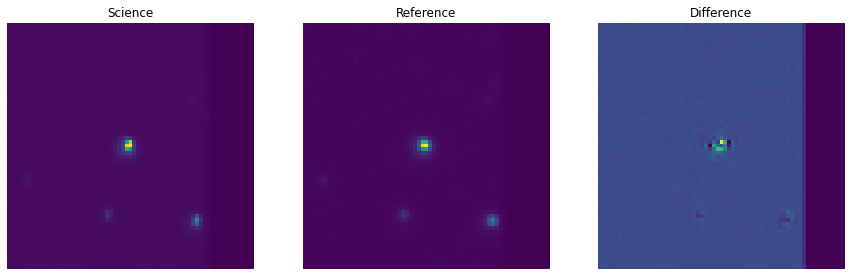

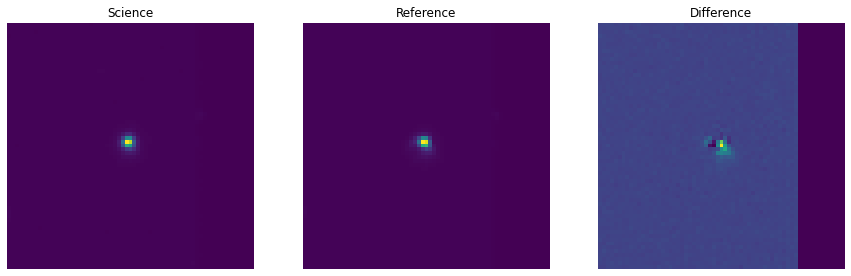

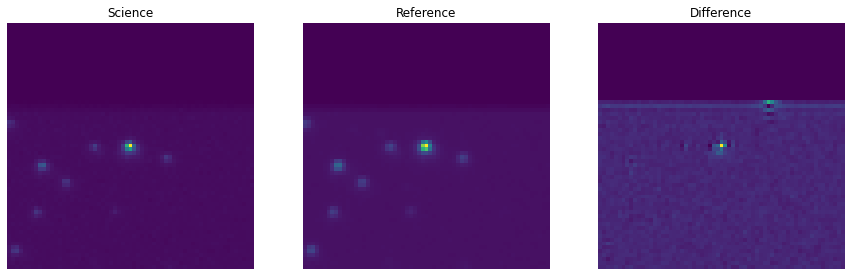

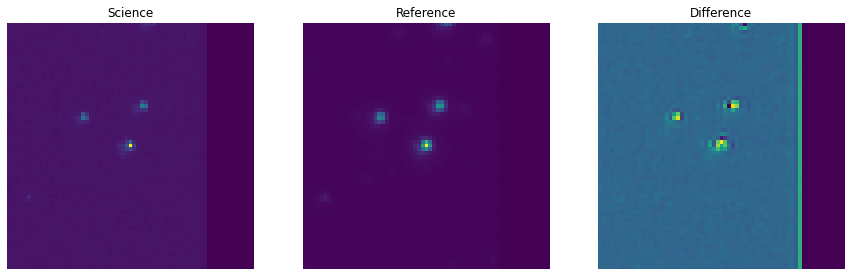

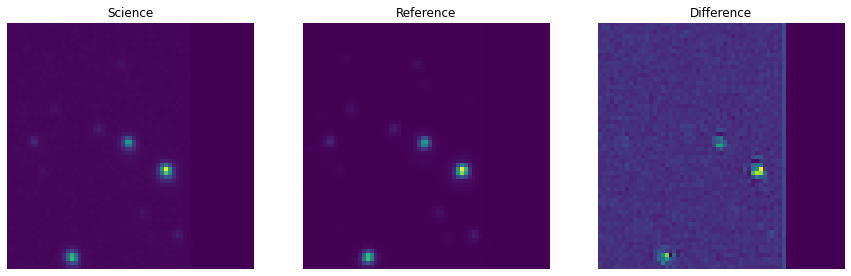

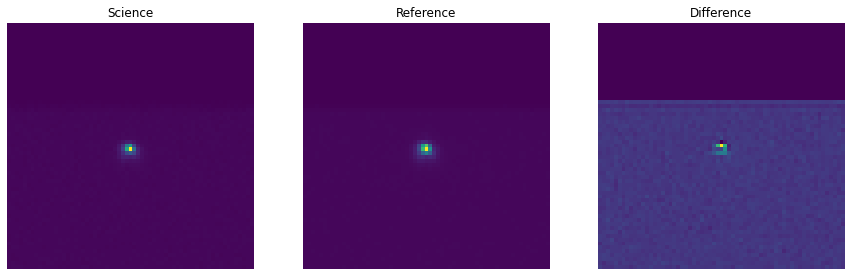

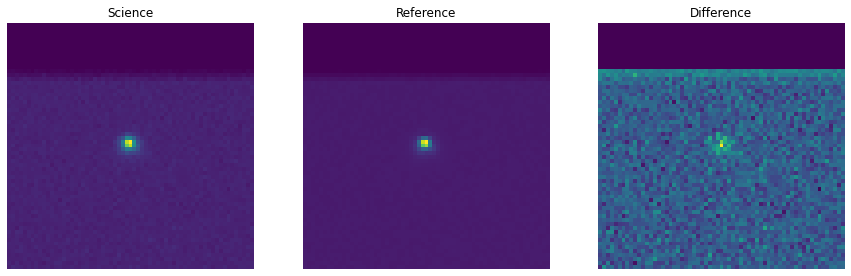

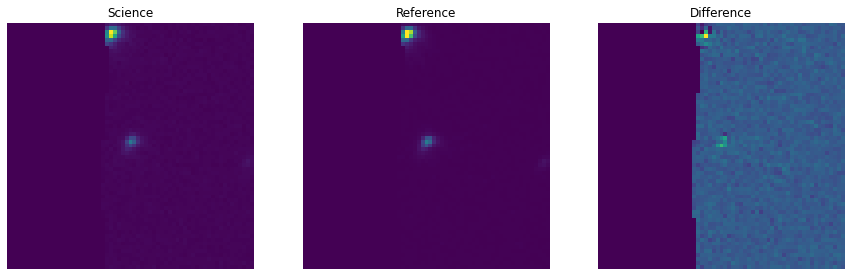

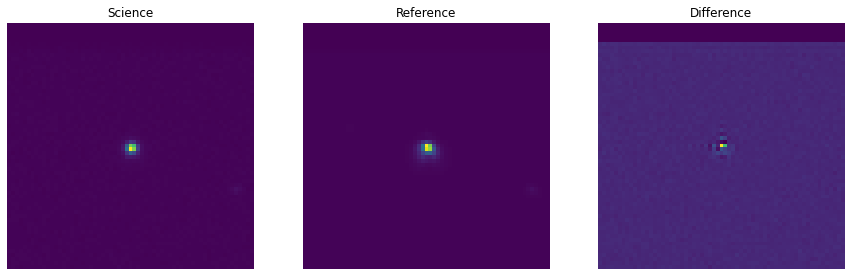

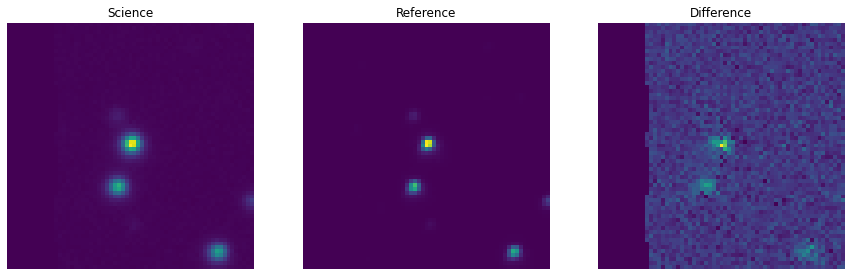

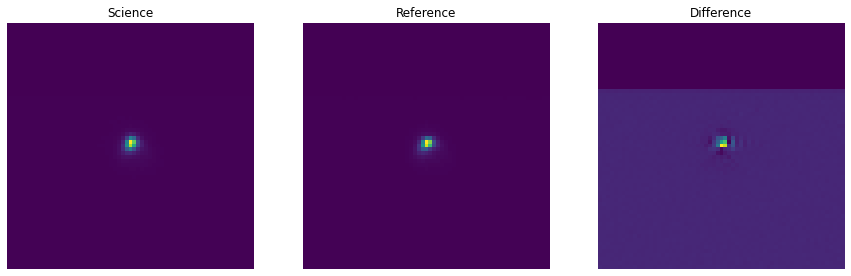

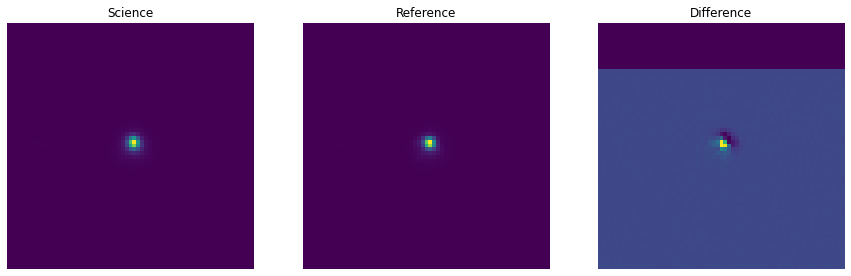

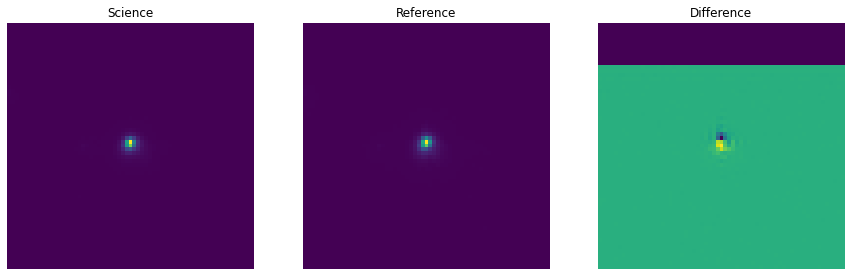

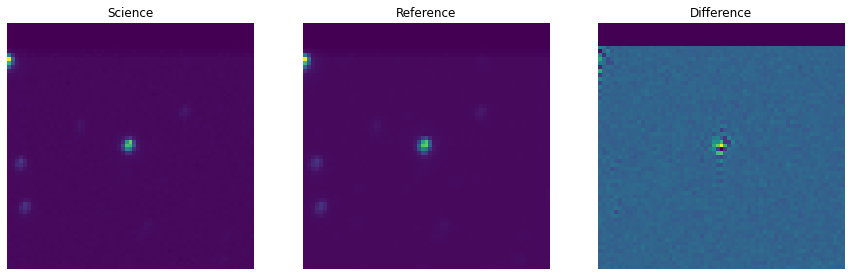

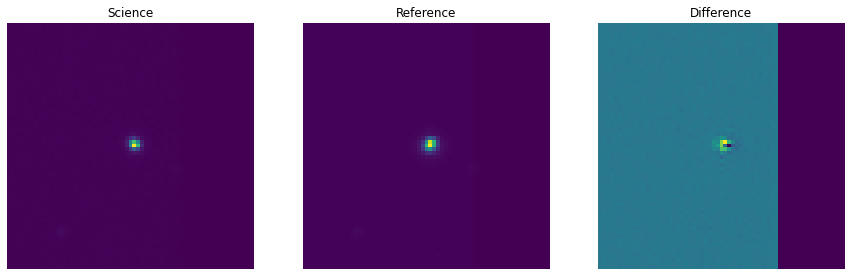

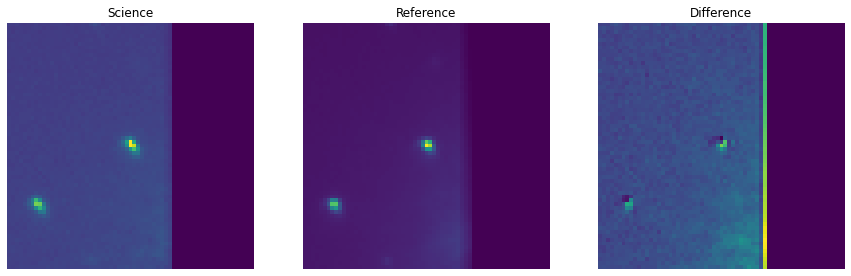

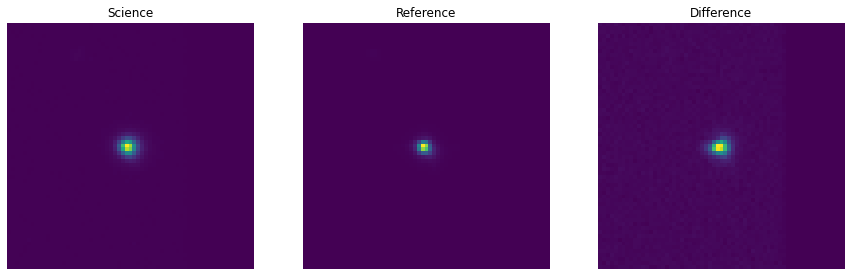

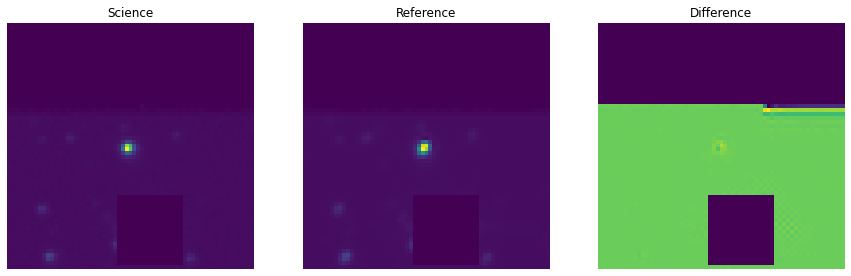

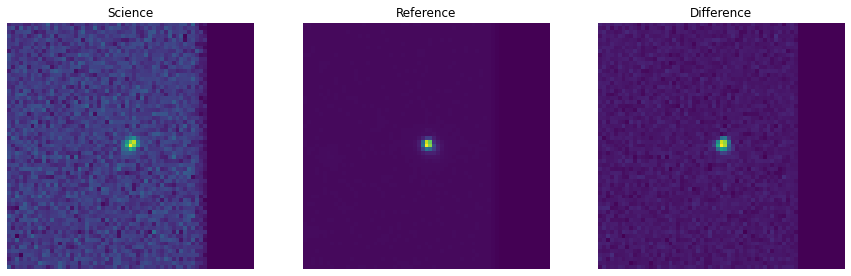

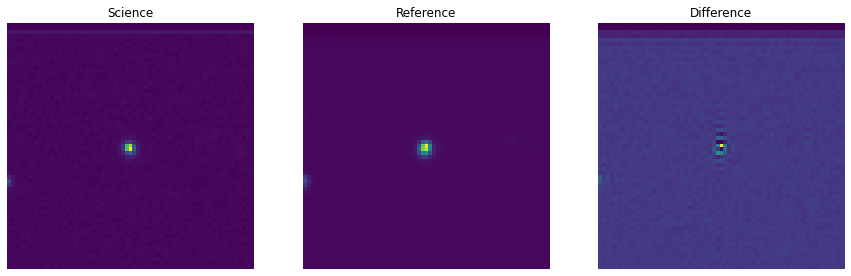

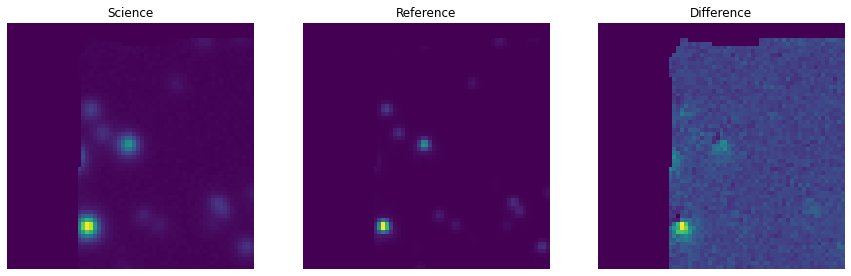

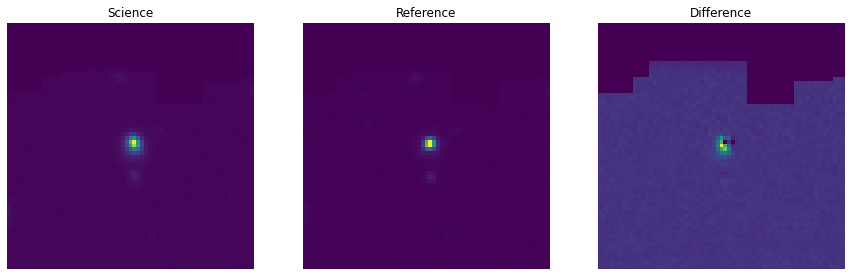

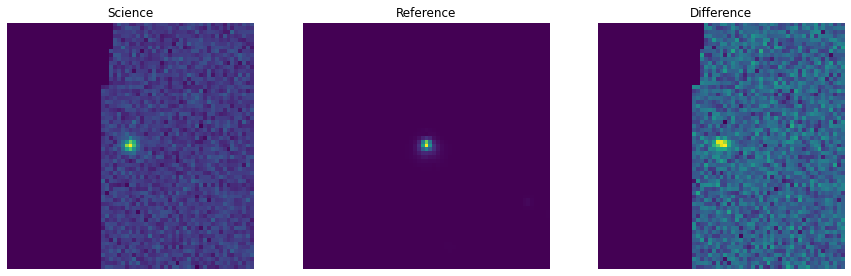

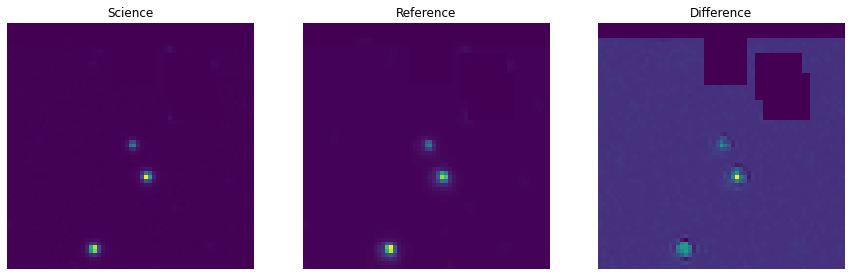

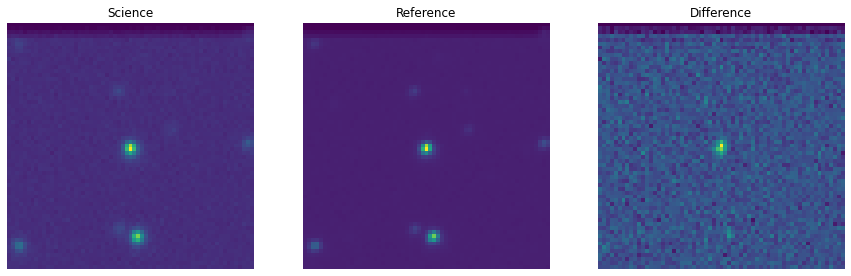

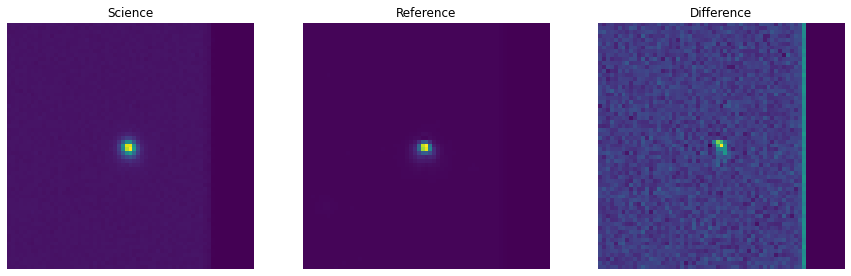

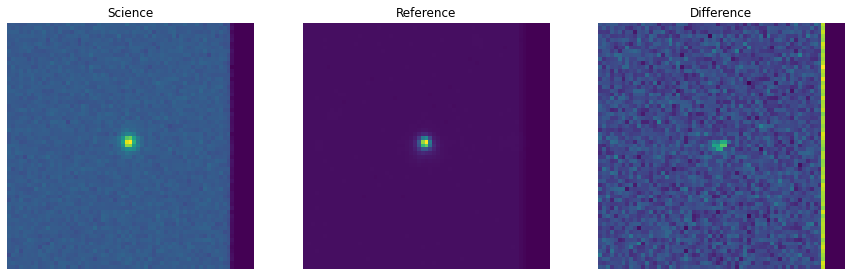

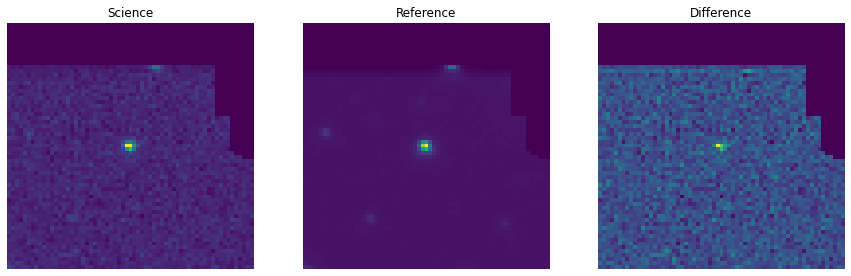

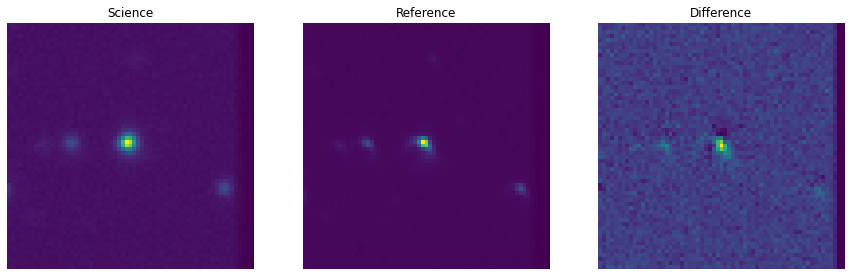

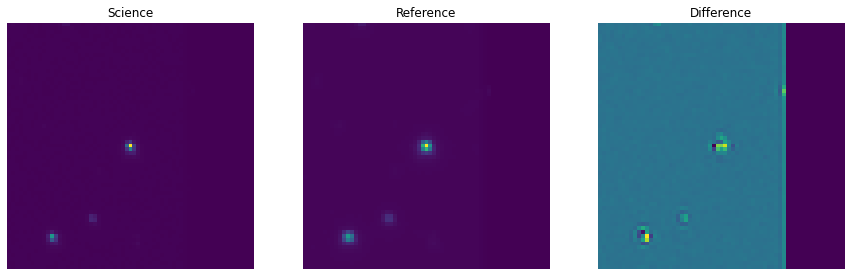

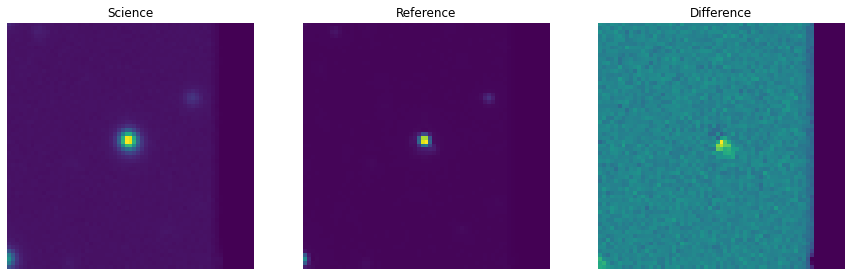

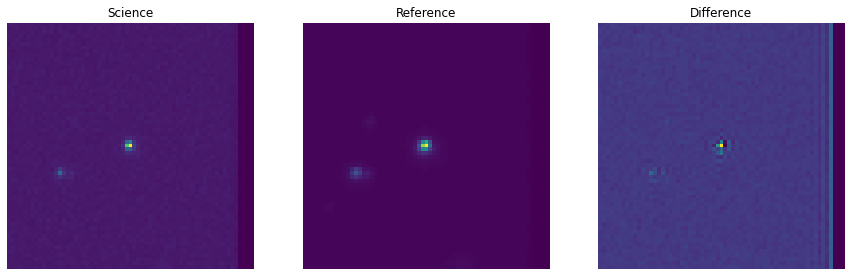

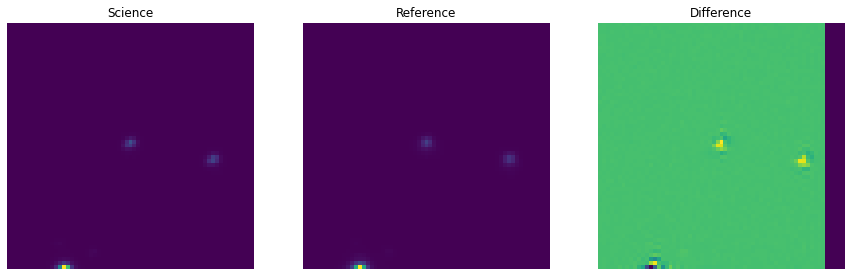

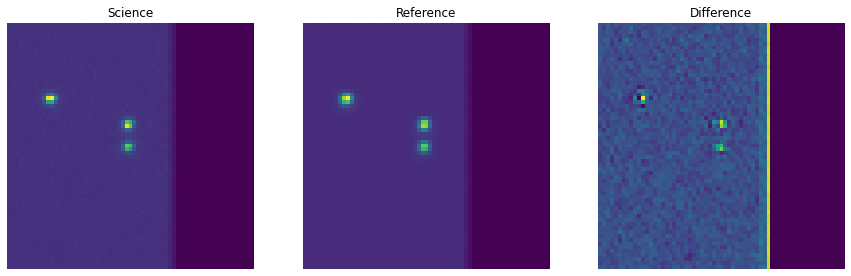

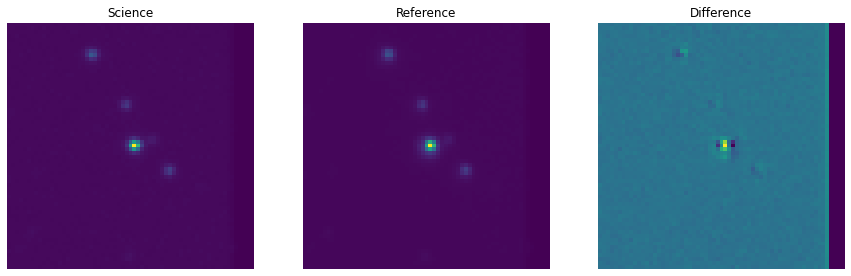

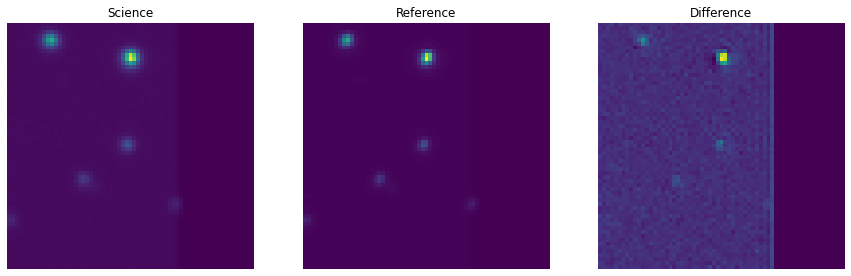

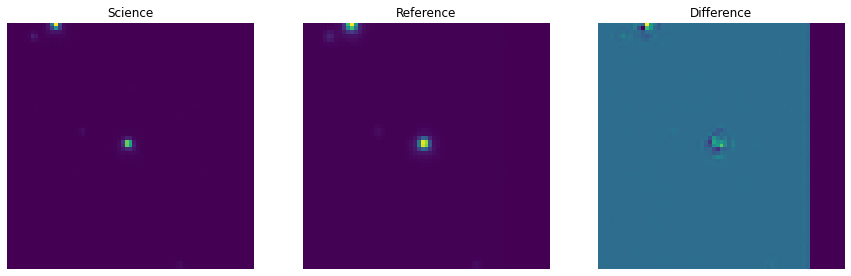

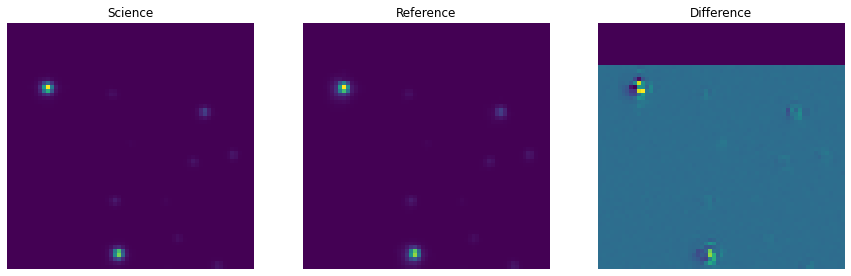

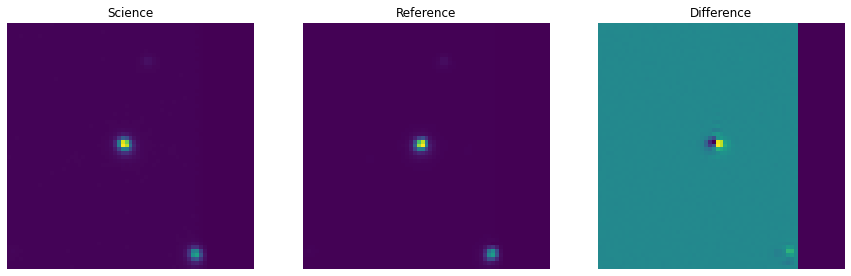

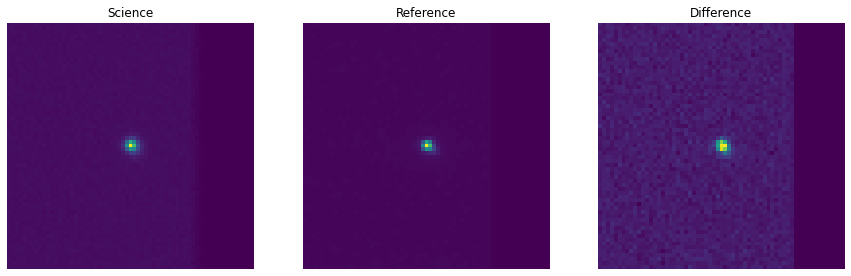

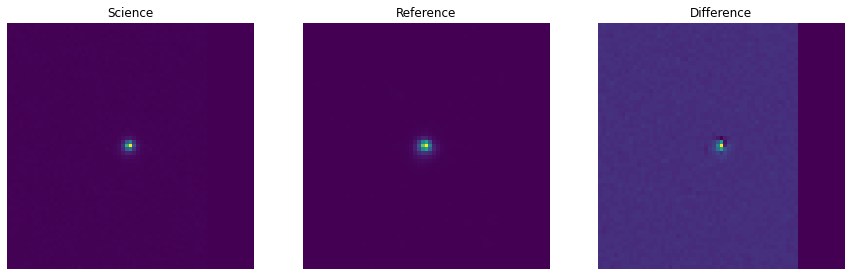

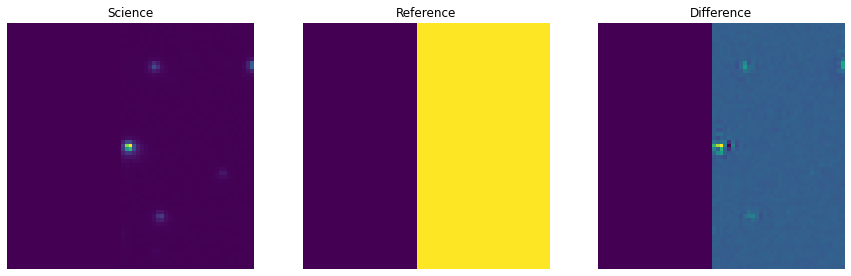

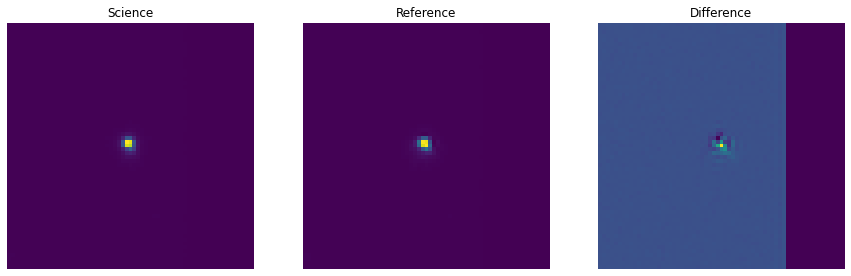

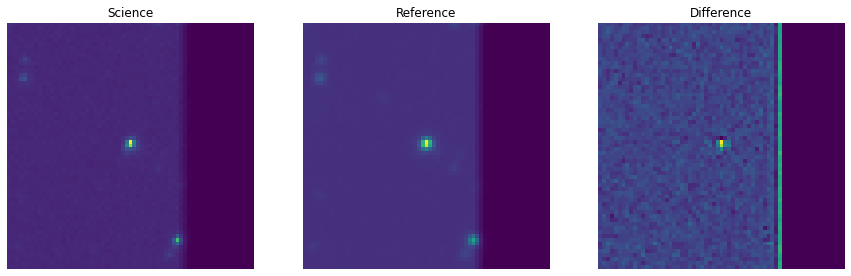

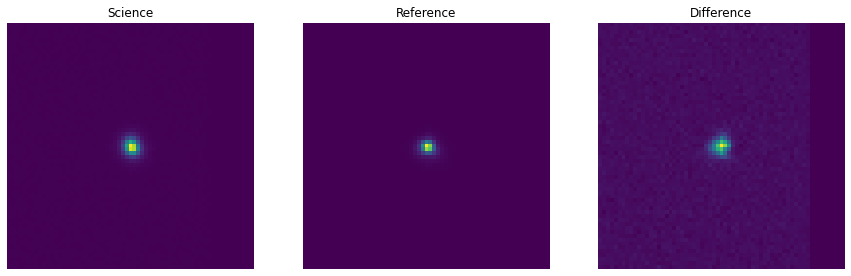

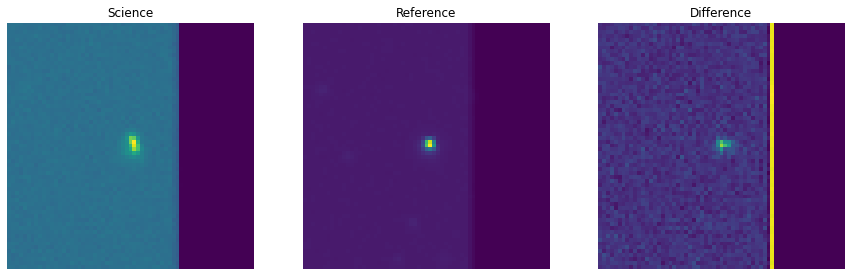

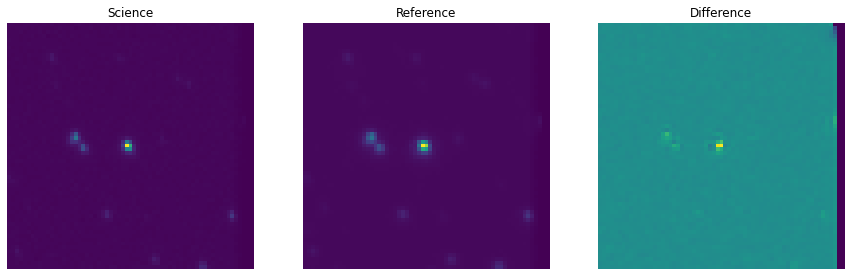

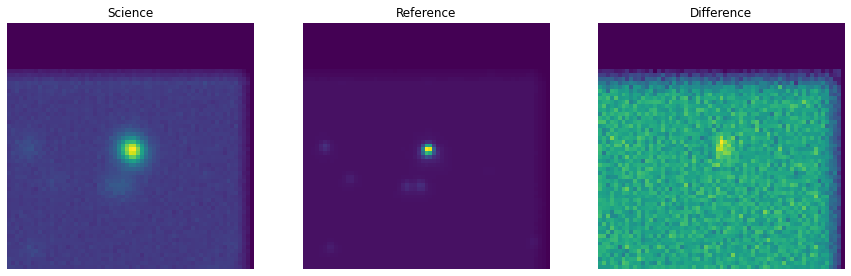

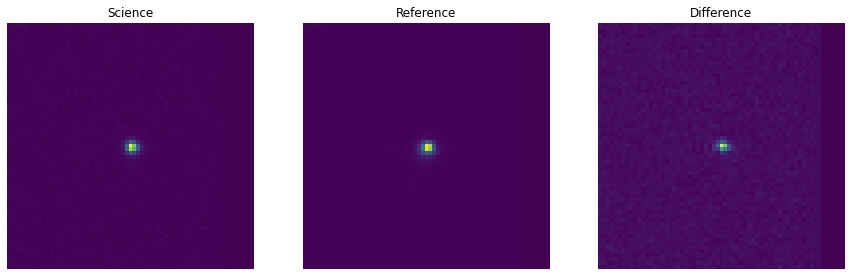

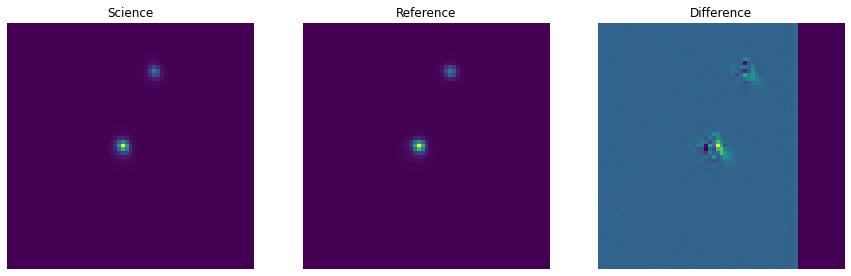

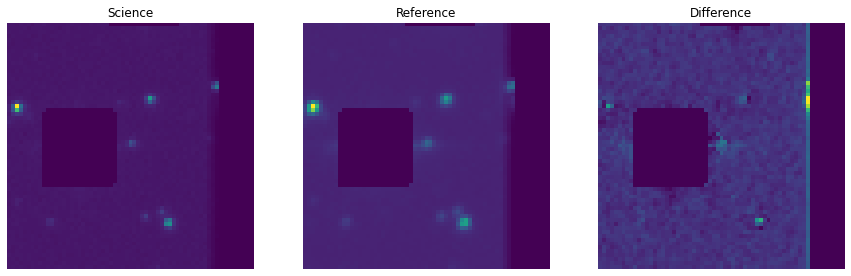

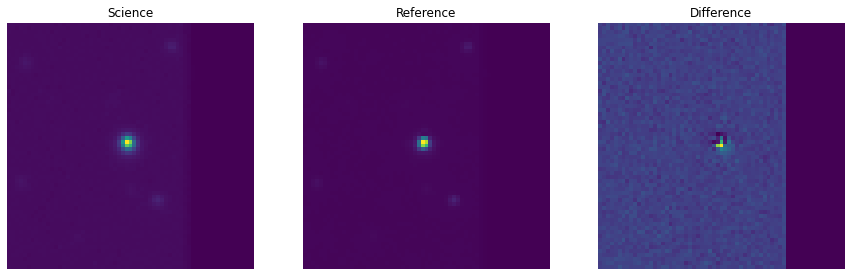

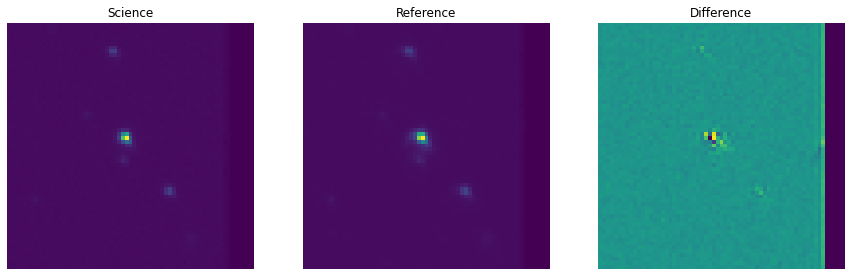

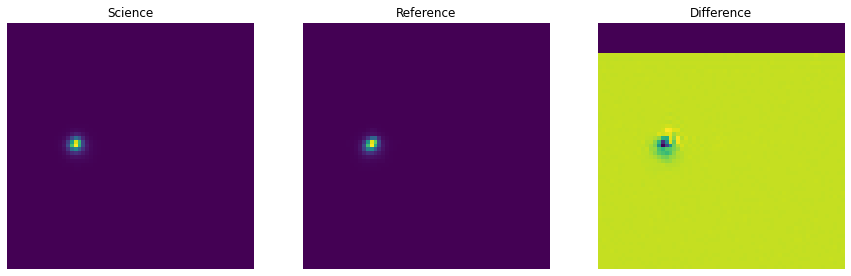

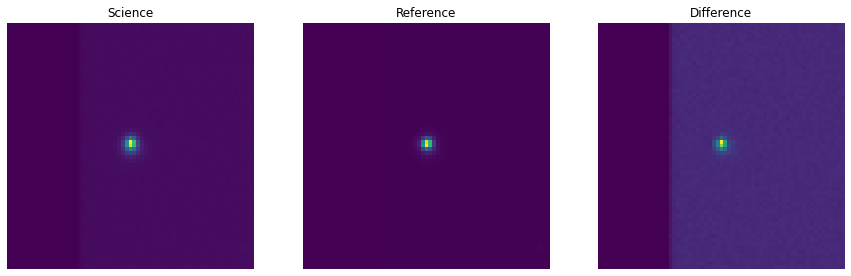

In [5]:
for index, row in df.iterrows():
          
    img = np.stack((row['cutoutScience'], row['cutoutTemplate'], row['cutoutDifference']),  axis=-1)
    
    stamp = repair_non_squared_stamp(img, row['xpos'], row['ypos'])
    stamp = preprocess_stamps(stamp, nan_val=0)
    
    if ((img.shape[0]!=63) | (img.shape[1]!=63)):
            
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,15))
    
        ax1.set_title("Science")
        ax1.imshow(stamp[:,:,0])
        ax1.axis('off')
    
        ax2.set_title("Reference")
        ax2.imshow(stamp[:,:,1])
        ax2.axis('off')
        
        ax3.set_title("Difference")
        ax3.imshow(stamp[:,:,2])
        ax3.axis('off')

        plt.show()

In [4]:
with open('../dataset/td_ztf_stamp_17_06_20_red.pkl', 'rb') as f:
    data_red = pickle.load(f)

features = ['sgscore1', 'distpsnr1', 'sgscore2', 'distpsnr2', 'sgscore3',
                 'distpsnr3', 'isdiffpos', 'fwhm', 'magpsf', 'sigmapsf', 'ra',
                 'dec', 'diffmaglim', 'rb', 'distnr', 'magnr', 'classtar',
                 'ndethist', 'ncovhist', 'ecl_lat', 'ecl_long', 'gal_lat',
                 'gal_long', 'non_detections', 'chinr', 'sharpnr']

#dataset = {'Train':{'images':[], 'features':[]}, 'Validation': data_red['Validation'], 'Test': data_red['Test']}
dataset = {'Train':{'images':[]}, 'Validation': data_red['Validation'], 'Test': data_red['Test']}

for path in os.listdir("../../pickles/"):
    
    if (".pickle" in path):
        
        print(path)
        df = pd.read_pickle("../../pickles/" + path)
    
        for index, row in df.iterrows():
          
            img = np.stack((row['cutoutScience'], row['cutoutTemplate'], row['cutoutDifference']),  axis=-1)
            stamp = repair_non_squared_stamp(img, row['xpos'], row['ypos'])
            stamp = preprocess_stamps(stamp, nan_val=0)
    
            dataset['Train']['images'].append(stamp)
            #dataset['Train']['features'].append([row[feature] for feature in features]) 

0.pickle
